# ALL_pairs_explo
### Overview:
* [Reading data](#Reading-data)
    * [Fundamental Pairs](#Fundamental-Pairs)
    * [Equity currency mapping](#Equity-currency-mapping)
    * [Forex](#Forex)
    * [Equities](#Equities)
    * [Indices](#Indices)
    * [OSEBX Factor correlations](#OSEBX-Factor-correlations)
    * [EQT Factor correlations](#EQT-Factor-correlations)
* [TRADE_4](#TRADE_4)
* [Testing](#Testing)
    * [TRADE_4 - With Correlations](#TRADE_4---With-Correlations)
    * [Comparing Strategies](#Comparing-Strategies)

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns; sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

from datetime import datetime, timedelta

### Printing and formatting
import json
from colorama import Fore, Style

import warnings
warnings.filterwarnings("ignore")

## Reading data
* Gjensidige fundamental -> GOOD

In [3]:
country_file_path = 'Japan_Pairs_2.xlsx'
fundamental_pair_file_path = 'TELENOR_PAIRS_F.xlsx'

### Fundamental Pairs

In [4]:
PAIRS_LIST_FUND = pd.ExcelFile(fundamental_pair_file_path).sheet_names
PAIRS_LIST_FUND

['TELE2 - telenor',
 'TELIA - telenor',
 'DEUTSCHE - telenor',
 'TELEFONICA - telenor',
 'TELEKOM - telenor',
 'VODAFONE - telenor',
 'SWISSCOM - telenor',
 'BT - telenor']

### Equity currency mapping

In [5]:
EQT_currency_mapping = pd.read_excel('CURRENY_MAPPING_ALL_EQT.xlsx', index_col='Equity')
EQT_currency_mapping = EQT_currency_mapping.T
EQT_currency_mapping

Equity,LVMH,L'OREAL,TOTALENERGIES,HERMES INTL.,SANOFI,CHRISTIAN DIOR,AIRBUS,BNP PARIBAS,KERING,SCHNEIDER ELECTRIC,...,TAIWAN SEMICON.MNFG.,LATTICE SEMICONDUCTOR,REALTEK SEMICON.,OCEANEERING,HELIX ENERGY SLTN.GP.,SCHLUMBERGER,HALLIBURTON,SUBSEA 7,WALLENIUS WILHELMSEN,A P MOLLER MAERSK B(WBO)
0,E,E,E,E,E,E,E,E,E,E,...,TW,U$,TW,U$,U$,U$,U$,NK,NK,E


### Forex

In [6]:
df_forex = pd.read_excel('DF_FOREX.xlsx', index_col='Name')
df_forex = df_forex[:'2022-03-01']
df_forex

,A$,BDT,BGN,BRL,BYN,C$,SF,CH,CZK,DK,...,SK,SGD,THB,TRY,TW,TWI,U$,VND,XDR,ZAR
Name,,,,,,,,,,,,,,,,,,,,,
2013-01-02,5.7905,NaN,3.7414,2.7032,NaN,5.6030,6.0525,0.8852,0.29017,0.9809,...,0.8538,4.5214,0.18186,3.1014,0.19021,90.22,5.5176,NaN,8.49825,0.6511
2013-01-03,5.8468,NaN,3.7281,2.7179,NaN,5.6423,6.0310,0.8924,0.28866,0.9774,...,0.8538,4.5518,0.18324,3.1222,0.19198,90.16,5.5652,NaN,8.53470,0.6481
2013-01-04,5.8420,NaN,3.7320,2.7445,NaN,5.6595,6.0362,0.9003,0.28787,0.9785,...,0.8556,4.5579,0.18385,3.1344,0.19318,90.30,5.6094,NaN,8.55374,0.6482
2013-01-07,5.8820,NaN,3.7356,2.7598,NaN,5.6763,6.0445,0.8993,0.28607,0.9794,...,0.8581,4.5563,0.18407,3.1439,0.19311,90.40,5.6032,NaN,8.55760,0.6519
2013-01-08,5.8764,NaN,3.7455,2.7661,NaN,5.6791,6.0581,0.8993,0.28630,0.9819,...,0.8541,4.5557,0.18390,3.1466,0.19296,90.44,5.5980,NaN,8.57660,0.6527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-23,6.4350,0.1027,5.1301,1.7662,3.3355,6.9706,9.6189,1.4000,0.40998,1.3488,...,0.9496,6.5781,0.27413,0.6396,0.31722,118.26,8.8448,0.000387,12.34618,0.5884
2022-02-24,6.4694,0.1051,5.1579,1.7737,3.2577,7.0465,9.7750,1.4288,0.40206,1.3558,...,0.9398,6.6696,0.27627,0.6284,0.32196,118.56,9.0368,0.000396,12.52437,0.5878
2022-02-25,6.4189,0.1034,5.1005,1.7385,3.2252,6.9638,9.5938,1.4084,0.40453,1.3405,...,0.9424,6.5733,0.27375,0.6444,0.31792,117.58,8.8941,0.000390,12.34317,0.5857


### Equities

In [7]:
PAIRS_LIST = pd.ExcelFile(country_file_path).sheet_names
PAIRS_LIST = [pair for pair in PAIRS_LIST if not pair.endswith('EIEND')]
PAIRS_LIST

['HONDA - ATEA',
 'HOYA - SELVA',
 'HONDA - MOWI',
 'MIZUH - OLAV ',
 'DAIKI - SELVA',
 'KYOCE - MOWI',
 'HONDA - KONGS',
 'TOKIO - MOWI',
 'MITSU - DNB B',
 'SUMIT - DNB B',
 'KEYEN - SELVA',
 'SHIN- - SELVA',
 'M3 - CONTE',
 'HONDA - YARA ',
 'HOYA - TOMRA',
 'BRIDG - ATEA',
 'HONDA - ABG S',
 'SUMIT - MOWI',
 'SUMIT - ATEA',
 'HONDA - SELVA',
 'TERUM - BAKKA',
 'TOYOT - YARA ',
 'HONDA - DNB B',
 'HONDA - VEIDE',
 'MITSU - TOTEN',
 'HONDA - BORRE',
 'SUMIT - OLAV ',
 'SMC - SELVA',
 'HONDA - TOMRA',
 'HONDA - LEROY',
 'BRIDG - OLAV ',
 'MITSU - SOGN ']

In [8]:
test_pair = pd.read_excel(country_file_path,
                          sheet_name = PAIRS_LIST[1],
                          index_col = 'Name')
test_pair.head()

,HOYA,SELVAAG BOLIG
Name,,
2013-01-02,247.808679,99.47
2013-01-03,250.071040,99.47
2013-01-04,255.861966,100.53
2013-01-07,258.212312,101.05
2013-01-08,256.801202,102.11


In [9]:
S = test_pair.iloc[:,0]
S = S.pct_change()[1:]
SC = df_forex['U$']
SC = SC.pct_change()[1:]

In [10]:
S.rolling(20).corr(SC).mean()

0.2773028897548136

### Indices

In [11]:
indices = pd.read_excel('MASTER_A.xlsx',
                        sheet_name = 'Indices2',
                        usecols=['Date', 'OSEBX', 'S&P 500', 'NYSE', 'FTSE 100',
                                 'MSCI CANADA','MSCI AUSTRALIA', 'CAC 40',
                                 'HANG SENG', 'TOPIX',
                                 ],
                        index_col = 'Date')
indices = indices[1:]
indices_returns = indices.pct_change()[1:]
indices_returns.index = indices_returns.index.astype(str) 
indices_returns.head()

,OSEBX,S&P 500,NYSE,FTSE 100,MSCI CANADA,MSCI AUSTRALIA,CAC 40,HANG SENG,TOPIX
Date,,,,,,,,,
2012-03-02,0.001704,-0.003205,-0.006075,-0.003392,-0.007050,0.003848,0.000411,0.008203,0.007553
2012-03-05,-0.013377,-0.003813,-0.004118,-0.006144,-0.009166,-0.000987,-0.003894,-0.013772,-0.005917
2012-03-06,-0.029738,-0.015341,-0.021120,-0.018556,-0.018658,-0.013369,-0.035836,-0.021587,-0.006616
2012-03-07,0.012440,0.007205,0.007798,0.006370,0.002698,-0.013842,0.008853,-0.008578,-0.005588
2012-03-08,0.018467,0.009915,0.012935,0.011797,0.009545,0.006234,0.025361,0.013232,0.016347


In [12]:
OSEBX = indices[['OSEBX']]['2013':]
OSEBX_returns = OSEBX.pct_change()[1:]
OSEBX_returns.head()

,OSEBX
Date,
2013-01-02,0.023441
2013-01-03,0.001672
2013-01-04,0.003756
2013-01-07,-0.006259
2013-01-08,0.004250


<AxesSubplot:xlabel='Date'>

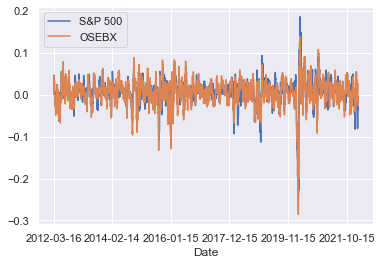

In [13]:
indices_10_day_pct_sum = indices_returns.rolling(10).sum()[10:]
indices_10_day_pct_sum.index = indices_10_day_pct_sum.index.astype(str) 
indices_10_day_pct_sum[['S&P 500', 'OSEBX']].plot()

<AxesSubplot:xlabel='Date'>

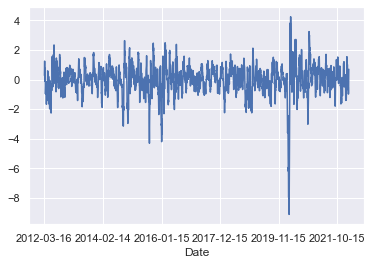

In [14]:
z = (indices_10_day_pct_sum['OSEBX'] - indices_10_day_pct_sum['OSEBX'].mean()) / indices_10_day_pct_sum['OSEBX'].std()
z.plot()

#### OSEBX Factor correlations

In [15]:
osebx_factor_corr_20 = pd.read_excel('OSEBX_factor_corr_20.xlsx', index_col='Date')
osebx_factor_corr_20_ALL = pd.read_excel('OSEBX_factor_corr_20_ALL.xlsx', index_col='Date')
# osebx_factor_corr_20 = osebx_factor_corr_20.add_suffix(' - OBX')
osebx_factor_corr_20_ALL.drop('WTI Crude Oil', axis=1, inplace=True)
osebx_factor_corr_20_ALL.head()

,Gold Bullion,Brent Europe,Copper,Aluminium,Baltic Dry Index,Natural Gas - RFV,Natural Gas - Henry Hub,Fish Pool Spot,Silver,VLCC,10Y NO,10Y US,10Y UK,NOK - USD,NOK - EUR,NOK - £
Date,,,,,,,,,,,,,,,,
2013-01-31,-0.006543,0.070319,-0.028497,-0.255769,0.504401,-0.273503,NaN,0.162876,0.067334,-0.296610,-0.218796,0.108522,0.021886,0.050894,-0.007809,-0.210990
2013-02-01,0.114115,0.067152,0.195357,-0.062344,0.357909,-0.155250,NaN,-0.139077,0.227181,-0.213381,-0.383263,0.200465,-0.011779,-0.110113,-0.016095,-0.391690
2013-02-04,0.120880,0.020994,0.161758,-0.020876,0.424372,-0.104800,NaN,-0.145185,0.275690,-0.210538,-0.371115,0.288598,-0.050941,-0.226685,0.049436,-0.443514
2013-02-05,0.128088,-0.034095,0.194686,-0.013620,0.423742,-0.139210,NaN,-0.132910,0.272004,-0.241692,-0.370405,0.223034,-0.057626,-0.287719,0.035671,-0.463963
2013-02-06,0.059569,0.022849,0.230081,0.024404,0.380066,-0.140855,NaN,-0.113772,0.294483,-0.262494,-0.292338,0.343709,0.010690,-0.278616,0.089990,-0.445851


<AxesSubplot:xlabel='Date'>

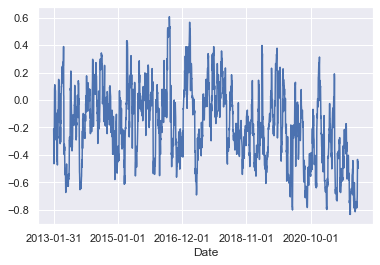

In [16]:
osebx_factor_corr_20_ALL['NOK - £'].plot()

#### EQT Factor correlations

In [17]:
equities_NO = ['EQUINOR', 'DNB BANK', 'MOWI', 'TELENOR', 'DNO', 'FRONTLINE',
       'GAMING INNOVATION GROUP', 'GJENSIDIGE FORSIKRING', 'NORSK HYDRO',
       'SCHIBSTED A', 'STOREBRAND', 'YARA INTERNATIONAL',
       'ABG SUNDAL COLLIER HOLDING', 'AEGA', 'AF GRUPPEN A', 'AKASTOR',
       'AKER', 'AKER BP', 'AKVA GROUP', 'ARCHER', 'ARCTICZYMES TECHNOLOGIES',
       'ARENDALS FOSSEKOMPANI', 'ATEA', 'AUSTEVOLL SEAFOOD', 'AWILCO DRILLING',
       'AWILCO LNG', 'AXACTOR', 'BAKKAFROST', 'BELSHIPS', 'BONHEUR',
       'BORGESTAD A', 'BORREGAARD', 'BOUVET', 'BW OFFSHORE', 'BYGGMA',
       'CARASENT', 'CONTEXTVISION', 'DOF', 'EIDESVIK OFFSHORE',
       'ELECTROMAG.GEOSVS.', 'ENDUR', 'ENSURGE MICROPOWER', 'FLEX LNG',
       'GC RIEBER SHIPPING', 'GRIEG SEAFOOD', 'HAVILA SHIPPING',
       'HEXAGON COMPOSITES', 'HUNTER GROUP', 'IDEX BIOMETRICS',
       'INTEROIL EXP.&. PRDN.', 'ITERA', 'JINHUI SHIPPING AND TRANSPORTATION',
       'KITRON', 'KMC PROPERTIES', 'KONGSBERG GRUPPEN', 'LEROY SEAFOOD GROUP',
       'MAGNORA', 'MEDI-STIM', 'NAVAMEDIC', 'NEKKAR', 'NEL', 'NORDIC MINING',
       'NORDIC SEMICONDUCTOR', 'NORWAY ROYAL SALMON', 'NORWEGIAN AIR SHUTTLE',
       'NRC GROUP', 'NTS', 'ODFJELL A', 'OLAV THON EIEP.', 'ORKLA',
       'OTELLO CORPORATION', 'PANORO ENERGY', 'PGS', 'PHILLY SHIPYARD',
       'PHOTOCURE', 'POLARIS MEDIA', 'PROSAFE', 'PROTECTOR FORSIKRING',
       'Q-FREE', 'REACH SUBSEA', 'REC SILICON', 'SALMAR', 'SANDNES SPAREBANK',
       'SCANA', 'SELVAAG BOLIG', 'SIEM OFFSHORE', 'SOGN SPAREBANK',
       'SOLSTAD OFFSHORE', 'SPAREBANK 1 SR-BANK', 'STOLT-NIELSEN',
       'STRONGPOINT', 'SUBSEA 7', 'TECHSTEP', 'TGS', 'TOMRA SYSTEMS',
       'TOTENS SPAREBANK', 'VEIDEKKE', 'VOSS VEKSEL- OG LANDMANDSBANK',
       'WALLENIUS WILHELMSEN', 'WILSON']

In [18]:
### 10-day rolling correlations

factor_corr_10 = {}

for eqt in equities_NO:
    
    if eqt == "AF GRUPPEN 'A'":
        eqt = "AF GRUPPEN A"
    if eqt == 'JINHUI SHIPPING AND TRANSPORTATION':
        eqt = eqt[:30]
        
    factor_corr_10[eqt] = pd.read_excel('NO_factor_correlations_10_ALL.xlsx',
                               sheet_name = eqt,
                               index_col  = 'Date')
    print('10 ', eqt)

10  EQUINOR
10  DNB BANK
10  MOWI
10  TELENOR
10  DNO
10  FRONTLINE
10  GAMING INNOVATION GROUP
10  GJENSIDIGE FORSIKRING
10  NORSK HYDRO
10  SCHIBSTED A
10  STOREBRAND
10  YARA INTERNATIONAL
10  ABG SUNDAL COLLIER HOLDING
10  AEGA
10  AF GRUPPEN A
10  AKASTOR
10  AKER
10  AKER BP
10  AKVA GROUP
10  ARCHER
10  ARCTICZYMES TECHNOLOGIES
10  ARENDALS FOSSEKOMPANI
10  ATEA
10  AUSTEVOLL SEAFOOD
10  AWILCO DRILLING
10  AWILCO LNG
10  AXACTOR
10  BAKKAFROST
10  BELSHIPS
10  BONHEUR
10  BORGESTAD A
10  BORREGAARD
10  BOUVET
10  BW OFFSHORE
10  BYGGMA
10  CARASENT
10  CONTEXTVISION
10  DOF
10  EIDESVIK OFFSHORE
10  ELECTROMAG.GEOSVS.
10  ENDUR
10  ENSURGE MICROPOWER
10  FLEX LNG
10  GC RIEBER SHIPPING
10  GRIEG SEAFOOD
10  HAVILA SHIPPING
10  HEXAGON COMPOSITES
10  HUNTER GROUP
10  IDEX BIOMETRICS
10  INTEROIL EXP.&. PRDN.
10  ITERA
10  JINHUI SHIPPING AND TRANSPORTA
10  KITRON
10  KMC PROPERTIES
10  KONGSBERG GRUPPEN
10  LEROY SEAFOOD GROUP
10  MAGNORA
10  MEDI-STIM
10  NAVAMEDIC
10  NEKKAR
1

In [19]:
### 15-day rolling correlations

factor_corr_15 = {}

for eqt in equities_NO:
    
    if eqt == "AF GRUPPEN 'A'":
        eqt = "AF GRUPPEN A"
    if eqt == 'JINHUI SHIPPING AND TRANSPORTATION':
        eqt = eqt[:30]
        
    factor_corr_15[eqt] = pd.read_excel('NO_factor_correlations_15_ALL.xlsx',
                               sheet_name = eqt,
                               index_col  = 'Date')
    print('15 ', eqt)

15  EQUINOR
15  DNB BANK
15  MOWI
15  TELENOR
15  DNO
15  FRONTLINE
15  GAMING INNOVATION GROUP
15  GJENSIDIGE FORSIKRING
15  NORSK HYDRO
15  SCHIBSTED A
15  STOREBRAND
15  YARA INTERNATIONAL
15  ABG SUNDAL COLLIER HOLDING
15  AEGA
15  AF GRUPPEN A
15  AKASTOR
15  AKER
15  AKER BP
15  AKVA GROUP
15  ARCHER
15  ARCTICZYMES TECHNOLOGIES
15  ARENDALS FOSSEKOMPANI
15  ATEA
15  AUSTEVOLL SEAFOOD
15  AWILCO DRILLING
15  AWILCO LNG
15  AXACTOR
15  BAKKAFROST
15  BELSHIPS
15  BONHEUR
15  BORGESTAD A
15  BORREGAARD
15  BOUVET
15  BW OFFSHORE
15  BYGGMA
15  CARASENT
15  CONTEXTVISION
15  DOF
15  EIDESVIK OFFSHORE
15  ELECTROMAG.GEOSVS.
15  ENDUR
15  ENSURGE MICROPOWER
15  FLEX LNG
15  GC RIEBER SHIPPING
15  GRIEG SEAFOOD
15  HAVILA SHIPPING
15  HEXAGON COMPOSITES
15  HUNTER GROUP
15  IDEX BIOMETRICS
15  INTEROIL EXP.&. PRDN.
15  ITERA
15  JINHUI SHIPPING AND TRANSPORTA
15  KITRON
15  KMC PROPERTIES
15  KONGSBERG GRUPPEN
15  LEROY SEAFOOD GROUP
15  MAGNORA
15  MEDI-STIM
15  NAVAMEDIC
15  NEKKAR
1

In [20]:
### 20-day rolling correlations

factor_corr_20 = {}

for eqt in equities_NO:
    
    if eqt == "AF GRUPPEN 'A'":
        eqt = "AF GRUPPEN A"
    if eqt == 'JINHUI SHIPPING AND TRANSPORTATION':
        eqt = eqt[:30]
        
    factor_corr_20[eqt] = pd.read_excel('NO_factor_correlations_20_ALL.xlsx',
                               sheet_name = eqt,
                               index_col  = 'Date')
    print('20 ', eqt)

20  EQUINOR
20  DNB BANK
20  MOWI
20  TELENOR
20  DNO
20  FRONTLINE
20  GAMING INNOVATION GROUP
20  GJENSIDIGE FORSIKRING
20  NORSK HYDRO
20  SCHIBSTED A
20  STOREBRAND
20  YARA INTERNATIONAL
20  ABG SUNDAL COLLIER HOLDING
20  AEGA
20  AF GRUPPEN A
20  AKASTOR
20  AKER
20  AKER BP
20  AKVA GROUP
20  ARCHER
20  ARCTICZYMES TECHNOLOGIES
20  ARENDALS FOSSEKOMPANI
20  ATEA
20  AUSTEVOLL SEAFOOD
20  AWILCO DRILLING
20  AWILCO LNG
20  AXACTOR
20  BAKKAFROST
20  BELSHIPS
20  BONHEUR
20  BORGESTAD A
20  BORREGAARD
20  BOUVET
20  BW OFFSHORE
20  BYGGMA
20  CARASENT
20  CONTEXTVISION
20  DOF
20  EIDESVIK OFFSHORE
20  ELECTROMAG.GEOSVS.
20  ENDUR
20  ENSURGE MICROPOWER
20  FLEX LNG
20  GC RIEBER SHIPPING
20  GRIEG SEAFOOD
20  HAVILA SHIPPING
20  HEXAGON COMPOSITES
20  HUNTER GROUP
20  IDEX BIOMETRICS
20  INTEROIL EXP.&. PRDN.
20  ITERA
20  JINHUI SHIPPING AND TRANSPORTA
20  KITRON
20  KMC PROPERTIES
20  KONGSBERG GRUPPEN
20  LEROY SEAFOOD GROUP
20  MAGNORA
20  MEDI-STIM
20  NAVAMEDIC
20  NEKKAR
2

In [21]:
### 50-day rolling correlations

factor_corr_50 = {}

for eqt in equities_NO:
    
    if eqt == "AF GRUPPEN 'A'":
        eqt = "AF GRUPPEN A"
    if eqt == 'JINHUI SHIPPING AND TRANSPORTATION':
        eqt = eqt[:30]
        
    factor_corr_50[eqt] = pd.read_excel('NO_factor_correlations_50_ALL.xlsx',
                               sheet_name = eqt,
                               index_col  = 'Date')
    print('50 ', eqt)

50  EQUINOR
50  DNB BANK
50  MOWI
50  TELENOR
50  DNO
50  FRONTLINE
50  GAMING INNOVATION GROUP
50  GJENSIDIGE FORSIKRING
50  NORSK HYDRO
50  SCHIBSTED A
50  STOREBRAND
50  YARA INTERNATIONAL
50  ABG SUNDAL COLLIER HOLDING
50  AEGA
50  AF GRUPPEN A
50  AKASTOR
50  AKER
50  AKER BP
50  AKVA GROUP
50  ARCHER
50  ARCTICZYMES TECHNOLOGIES
50  ARENDALS FOSSEKOMPANI
50  ATEA
50  AUSTEVOLL SEAFOOD
50  AWILCO DRILLING
50  AWILCO LNG
50  AXACTOR
50  BAKKAFROST
50  BELSHIPS
50  BONHEUR
50  BORGESTAD A
50  BORREGAARD
50  BOUVET
50  BW OFFSHORE
50  BYGGMA
50  CARASENT
50  CONTEXTVISION
50  DOF
50  EIDESVIK OFFSHORE
50  ELECTROMAG.GEOSVS.
50  ENDUR
50  ENSURGE MICROPOWER
50  FLEX LNG
50  GC RIEBER SHIPPING
50  GRIEG SEAFOOD
50  HAVILA SHIPPING
50  HEXAGON COMPOSITES
50  HUNTER GROUP
50  IDEX BIOMETRICS
50  INTEROIL EXP.&. PRDN.
50  ITERA
50  JINHUI SHIPPING AND TRANSPORTA
50  KITRON
50  KMC PROPERTIES
50  KONGSBERG GRUPPEN
50  LEROY SEAFOOD GROUP
50  MAGNORA
50  MEDI-STIM
50  NAVAMEDIC
50  NEKKAR
5

In [94]:
# %whos
# %who

In [400]:
def TRADE_5(S1: pd.Series,
            S2: pd.Series,
            short_window:  int,  
            long_window:   int,
            start_capital: int = 1_000_000,
            cutoff_outer:  float = 1.0,
            cutoff_amp:    float = 1.5,        # multiplier of cutoff_outer, signalling additional BUY/SELL
            extra_order_mult: float = 2.0,     # float to be multiplied in "amplified" order
            cutoff_inner:  float = 0.33,
            rolling_z:     bool  = True,
            print_actions: bool  = False,
            print_weighted: bool = True,
            use_factor_weights: bool = True,
            include_osebx: bool = False,
            corr_days_test: int = 20,
            good_days_limit: int = 1,
            include_prev_day_signal = False,
            test_split: float = 0.7) -> float:
    
    """
    function for performing the proposed trading-framework. The function returns
    the amount of money accumulated over the trading period
    
    """
    CUTOFF_AMP = cutoff_outer*cutoff_amp
    
    obx_seq_returns = S2.pct_change()[1:]
    
    assert obx_seq_returns.isnull().any() == 0, "nul-values in obx_seq_returns"
    
    ### Getting the currency for the foreign component of the pair
    ### The currency return series will
    
    forex_name = EQT_currency_mapping[S1.name]
    forex_series = df_forex[forex_name].pct_change()[1:]
    forex_series = forex_series.reindex(S1.index, axis='index')
    
    eqt_forex_10_day_corr = obx_seq_returns.rolling(10).corr(forex_series)[10:]
    eqt_forex_10_day_corr = eqt_forex_10_day_corr.fillna(method='bfill', limit=2)
    
    eqt_forex_15_day_corr = obx_seq_returns.rolling(15).corr(forex_series)[15:]
    eqt_forex_15_day_corr = eqt_forex_15_day_corr.fillna(method='bfill', limit=2)
    
    eqt_forex_20_day_corr = obx_seq_returns.rolling(20).corr(forex_series)[20:]
    eqt_forex_20_day_corr = eqt_forex_20_day_corr.fillna(method='bfill', limit=2)
    
    eqt_forex_50_day_corr = obx_seq_returns.rolling(50).corr(forex_series)[50:]
    eqt_forex_50_day_corr = eqt_forex_50_day_corr.fillna(method='bfill', limit=2)
    
#     print(eqt_forex_10_day_corr.isnull().sum())

    assert eqt_forex_10_day_corr.isnull().sum().any() == 0, "nul-values in eqt_forex_10_day_corr"
    assert eqt_forex_15_day_corr.isnull().sum().any() == 0, "nul-values in eqt_forex_15_day_corr"
    assert eqt_forex_20_day_corr.isnull().sum().any() == 0, "nul-values in eqt_forex_20_day_corr"
    assert eqt_forex_50_day_corr.isnull().sum().any() == 0, "nul-values in eqt_forex_50_day_corr"
    
    ### Norwegian equity factor correlations
    # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    
    if S2.name == "AF GRUPPEN 'A'":
        S2.name = 'AF GRUPPEN A'
    
    NO_corr_10 = factor_corr_10[S2.name]
    NO_corr_10 = pd.concat([NO_corr_10, eqt_forex_10_day_corr], axis=1)
    NO_corr_10.dropna(axis=0, how='any', inplace=True)

    
    NO_corr_15 = factor_corr_15[S2.name]
    NO_corr_15 = pd.concat([NO_corr_15, eqt_forex_15_day_corr], axis=1)
    NO_corr_15.dropna(axis=0, how='any', inplace=True)

    
    NO_corr_20 = factor_corr_20[S2.name]
    NO_corr_20 = pd.concat([NO_corr_20, eqt_forex_20_day_corr], axis=1)
    NO_corr_20.dropna(axis=0, how='any', inplace=True)

    NO_corr_50 = factor_corr_50[S2.name]
    NO_corr_50 = pd.concat([NO_corr_50, eqt_forex_50_day_corr], axis=1)
    NO_corr_50.dropna(axis=0, how='any', inplace=True)
       
    OBX_factor_corr = osebx_factor_corr_20_ALL
    
    OBX_factor_corr = OBX_factor_corr.reindex(eqt_forex_20_day_corr.index, axis='index')
    OBX_factor_corr = pd.concat([OBX_factor_corr, eqt_forex_20_day_corr], axis=1)
    OBX_factor_corr.dropna(axis=0, how='any', inplace=True)
    

    
    indices_rolling_sum = indices_10_day_pct_sum
    indices_rolling_sum = indices_rolling_sum.reindex(S1.index, axis='index')
    indices_rolling_sum.dropna(axis=1, how='any', inplace=True)
    
    ### how  much has the norwegian equity risen / fallen
    
    NO_eqt_rolling_sum = obx_seq_returns.rolling(10).sum()[10:]
    NO_eqt_rolling_sum.index = NO_eqt_rolling_sum.index.astype(str)

    assert (NO_corr_10.isnull().sum().sum()) == 0, "nul-values present in factors -> 10"
    assert (NO_corr_15.isnull().sum().sum()) == 0, "nul-values present in factors -> 15"
    assert (NO_corr_20.isnull().sum().sum()) == 0, "nul-values present in factors -> 20"
    assert (NO_corr_50.isnull().sum().sum()) == 0, "nul-values present in factors -> 50"
    assert (OBX_factor_corr.isnull().sum().sum()) == 0, "nul-values present in OBX_factor_corr"
    assert (indices_rolling_sum.isnull().sum().sum()) == 0, "nul-values present in indices_rolling_sum"

    
    assert (short_window > 0) and (long_window > 0), \
    "Null / Negative widnow values "

    # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    
    ### Splitting
    
    if corr_days_test == 20:
    

        S1 = S1[NO_corr_20.index[0]:]
        S2 = S2[NO_corr_20.index[0]:]
        
        OBX_factor_corr = OBX_factor_corr[NO_corr_20.index[0]:]
        indices_rolling_sum = indices_rolling_sum[NO_corr_20.index[0]:]
        NO_eqt_rolling_sum = NO_eqt_rolling_sum[NO_corr_20.index[0]:]
    
    elif corr_days_test == 15:
    
        S1 = S1[NO_corr_15.index[0]:]
        S2 = S2[NO_corr_15.index[0]:]
        
        OBX_factor_corr = OBX_factor_corr[NO_corr_15.index[0]:]
        indices_rolling_sum = indices_rolling_sum[NO_corr_15.index[0]:]
        NO_eqt_rolling_sum = NO_eqt_rolling_sum[NO_corr_15.index[0]:]
        
    elif corr_days_test == 10:

        S1 = S1[NO_corr_10.index[0]:]
        S2 = S2[NO_corr_10.index[0]:]
        
        OBX_factor_corr = OBX_factor_corr[NO_corr_10.index[0]:]
        indices_rolling_sum = indices_rolling_sum[NO_corr_10.index[0]:]
        NO_eqt_rolling_sum = NO_eqt_rolling_sum[NO_corr_10.index[0]:]
        

     
    # Checking for nul-values after re-indexing
    assert (OBX_factor_corr.isnull().sum().sum()) == 0, "nul-values present in OBX_factor_corr"
    assert (indices_rolling_sum.isnull().sum().sum()) == 0, "nul-values present in indices_rolling_sum"
    assert (NO_eqt_rolling_sum.isnull().sum().sum()) == 0, "nul-values present in NO_eqt_rolling_sum"
    
    split = int(len(S1) * test_split)
    test_part_split = len(S1) - split
    
    S1_train = S1.iloc[:split]
    S2_train = S2.iloc[:split]
    
    S1_test = S1.iloc[split:]
    S2_test = S2.iloc[split:]
    
    ratios_train = S1_train / S2_train
    ratios_test = S1_test / S2_test
    
    OBX_factor_corr = OBX_factor_corr[split:]

    ### Indices
    
    indices_rolling_sum_test = indices_rolling_sum[split:]
    indices_rolling_sum_train = indices_rolling_sum[:split]
    
    incides_rolling_sum_test_z = (indices_rolling_sum_test - indices_rolling_sum_train.mean()) \
                                  / indices_rolling_sum_train.std()
    ### NO equity
    
    NO_eqt_rolling_sum_test = NO_eqt_rolling_sum[split:]
    NO_eqt_rolling_sum_train = NO_eqt_rolling_sum[:split]
    
    NO_eqt_rolling_sum_test_z = (NO_eqt_rolling_sum_test - NO_eqt_rolling_sum_train.mean()) \
                                  / NO_eqt_rolling_sum_train.std()

    
    # IMPORTANT -> scale the z-scores of the test set with the data from the train set.
    # The mean and std of the "entire" test set is not attainable when testing each day going forward.
    zscore = (ratios_test - ratios_train.mean()) / ratios_train.std()
    
    if corr_days_test == 20:
        factors_test = NO_corr_20[split:]    # From the start of the test set and out ->
    elif corr_days_test == 10:
        factors_test = NO_corr_10[split:]    # From the start of the test set and out ->
    elif corr_days_test == 15:
        factors_test = NO_corr_15[split:]

    ### Concatenating zscore and factors
    
    zscore_and_factors = pd.concat([zscore, factors_test], axis=1)
    zscore_and_factors.rename(columns={0: 'z-score'}, inplace=True)
    
    assert zscore_and_factors.shape[1] == factors_test.shape[1] + 1, "shapes are off"
    
    ### For the "New" check

    z_score_osebx_factors_indices = pd.concat([zscore, OBX_factor_corr, incides_rolling_sum_test_z], axis=1)

    assert zscore_and_factors.isnull().sum().sum() == 0, "nul-values present in concatenated test set"
    assert z_score_osebx_factors_indices.isnull().sum().sum() == 0, "nul-values present in concatenated test set (2)"
        

    ### Assessing factor sensitivity
    ### Using data from the train period
    ### The mean factor correlation over the last 600 days will form the basis for comparison
    ### against more recent correlations (in the test set)
    ### ****************************************************************************************
    
    factor_senstivity = {}      # Dictionary: {factor name: sensitivity (LOW, MED, HIGH)}
    factor_low_corr_list = []   # List of all factor_names where sensitiity == LOW
    
    corr_look_back_days = 600
    
    last_date_train = pd.to_datetime(S1_train.index[-1])
    look_back_start = str((last_date_train) - timedelta(corr_look_back_days))[:-9]
    
    NO_eqt_name = S2.name       # the Norwegian equities are always stored in the second column of the pair-df

#     factor_lookback_frame = factor_corr_50[NO_eqt_name][look_back_start:]
    factor_lookback_frame = NO_corr_50[look_back_start:]
    
    assert factor_lookback_frame.isnull().sum().sum() == 0, "nul-values exist"
    


    for f in factor_lookback_frame.columns:
        if f == 'Natural Gas - Henry Hub':
            continue
        if factor_lookback_frame.mean()[f] > 0.3:
            factor_senstivity[f] = 'HIGH'
        elif factor_lookback_frame.mean()[f] < 0.1:             # Historic mean treshold for a factor to be labeled "LOW"
            factor_senstivity[f] = 'LOW'    # May make this as an input parameter, to investigate changes in result
            factor_low_corr_list.append(f)
        else:
            factor_senstivity[f] = 'MED'
            
    ### ****************************************************************************************

    
    ### Finding the starting point of the ratios. Correlations are calculated based on the given look-back
    ### Window, so the first ... days need to be skipped in order to calculated the initial correlations
    ### based on these days. This is all done regarding the TEST SET

    first_date_test = pd.to_datetime(zscore_and_factors.index[0])
    start_date_test = str((first_date_test) + timedelta(corr_days_test))[:-9]
    
    zscore_and_factors = zscore_and_factors[start_date_test:]
    z_score_osebx_factors_indices = z_score_osebx_factors_indices[start_date_test:]
    NO_eqt_rolling_sum_test_z = NO_eqt_rolling_sum_test_z[start_date_test:]
    
    
    ZSCORE = zscore_and_factors['z-score']
    FACTORS = zscore_and_factors.iloc[:,1:]
    INDICES_SUM_Z = z_score_osebx_factors_indices.loc[:,incides_rolling_sum_test_z.columns]
    NO_EQT_SUM_Z = NO_eqt_rolling_sum_test_z
    OSEBX_FACTORS = z_score_osebx_factors_indices.loc[:, OBX_factor_corr.columns]
    

    ### Simulate trading: start with zero money and no positions
    
    AMOUNT_AVAILABE = start_capital
    money = start_capital
    
    count_S1 = 0  
    count_S2 = 0
    
    num_trades = 0
    num_trade_bulks = 0

    current_amount_S1 = 0
    current_amount_S2 = 0
    
    ### Cumulative profit
    
    pS1 = 0
    pS2 = 0
    
    state = [None] * (len(ZSCORE))
    STATE_DICT = {}
    
    ### Dictionary of the amount set in a trade and the return
    
    return_dict_S1 = {}
    return_dict_S2 = {}
    
    return_dict = {}
    return_dict_formatted = {}
    
    ### Tracking the weight of the trade for each time step
    weight_list = []
    up_weighted_trades_list = []
    up_weighted_trades_dict = {2: 0, 2.2: 0, 3: 0}
    
    num_correlated_days = 0
    num_up_weighed_trades = 0
    
    corr_strength = {}
    
    S1_test = S1_test[start_date_test:]
    S2_test = S2_test[start_date_test:]
    
    has_reversed = [True if -cutoff_inner < ZSCORE[0] < cutoff_inner else False]
    
    Good_days = {}
    Super_Good_days = {}
    

    for i in range(1, len(ZSCORE)):
        
        CURRENT_DAY = zscore_and_factors.index[i]
        PREV_DAY = zscore_and_factors.index[i-1]
#         PREV_PREV_DAY = zscore_and_factors.index[i-1]
        
        ratio_ = S1_test[i] / S2_test[i]
        
        weight = 1
        
        ### Data for the current timepoint of the loop
        
        current_factors = zscore_and_factors.iloc[i,:]
        current_osebx_sum_z = INDICES_SUM_Z.loc[CURRENT_DAY, 'OSEBX']
        current_indices_sum_z = INDICES_SUM_Z.iloc[i,:]
        current_osebx_factors = OSEBX_FACTORS.iloc[i,:]        
        
        assert current_factors.shape == (len(zscore_and_factors.columns), ), "wrong shape of factors-entry"
        
        ### USING THE FACTOR CORRELATIONS
        
        #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
        
        if use_factor_weights:
        
            num_correlated_factors = 0

            for factor_name in factor_low_corr_list:

                if 0.60 <= current_factors[factor_name] < 0.70  :          ### BOUNDARY FOR "LOW-FACTOR" TO BE MARKED AS ""
                    weight = 2
                    if print_weighted:

                        print(f'{CURRENT_DAY:<3} | {factor_name}: {current_factors[factor_name]:.2f} -> {weight}')

                    up_weighted_trades_list.append(factor_name)
                    up_weighted_trades_dict[weight] +=1
                    num_correlated_factors +=1
                    corr_strength[CURRENT_DAY] = 0.60                    
            

                elif 0.70 <= current_factors[factor_name] < 0.80 :
                    weight = 2.2
                    if print_weighted:

                        print(f'{CURRENT_DAY:<3} | {factor_name}: {current_factors[factor_name]:>3.2f} -> {weight}')

                    up_weighted_trades_list.append(factor_name)
                    up_weighted_trades_dict[weight] +=1
                    num_correlated_factors +=1
                    corr_strength[CURRENT_DAY] = 0.70

                elif 0.80 <= current_factors[factor_name]:
                    weight = 3
                    if print_weighted:

                        print(f'{CURRENT_DAY:<3} | {factor_name}: {current_factors[factor_name]:>3.2f} -> {weight}')

                    up_weighted_trades_list.append(factor_name)
                    up_weighted_trades_dict[weight] +=1
                    num_correlated_factors +=1
                    corr_strength[CURRENT_DAY] = 0.80

            if num_correlated_factors == 0:
                corr_strength[CURRENT_DAY] = 'No detected correlation'
            elif num_correlated_factors >= good_days_limit:
                Good_days[CURRENT_DAY] = num_correlated_factors

            if weight != 1:
                num_correlated_days += 1

#             weight_list.append(weight)

            
                
        #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
        
        ### Alternative 2 -> OSEBX
        
        # 1. OSEBX høy korr med hist lavt korrelert
        # 2. OSEBX har falt relativt mye
        # 3. Norsk aksje har falt relativt mye (drratt med ned av HELE børsen)
        
        #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
        
        if include_osebx:
            
            for factor_name in factor_low_corr_list:

                if (current_osebx_factors[factor_name] >= 0.60) & \
                   (current_osebx_sum_z < np.quantile(current_indices_sum_z, 0.4)) & \
                   (NO_EQT_SUM_Z[i] < -1.8):
                    
                    Super_Good_days[CURRENT_DAY] = CURRENT_DAY
                    
                    weight = weight * 1.5
                    
        if include_prev_day_signal:
                    
            if Super_Good_days.get(PREV_DAY) == PREV_DAY:

                weight = weight * 1.5

#                 print(CURRENT_DAY, '2 PREV CATCHED', weight)

                
        #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤        
        
        ### Sell short if the z-score is > 1
        # ------------------------------------------------------------------------------------------------
        ### 1 -> "Normal order"
        if (ZSCORE[i] >= cutoff_outer) & (ZSCORE[i-1] < cutoff_outer):
            
            if (weight * S1_test[i]) < AMOUNT_AVAILABE:

                num_trades +=1
            
                state[i] = 'Selling'
                STATE_DICT[CURRENT_DAY] = 'Selling'
                
                AMOUNT_AVAILABE -= weight * S1_test[i]
                 
                # sell S1, buy S2
                money += (weight * S1_test[i]) - (weight * S2_test[i] * ratio_)    # Money neutral (0) before reversion of trades

                count_S1 -= weight
                count_S2 += weight * ratio_

                current_amount_S1 += S1_test[i] * weight
                current_amount_S2 += S2_test[i] * ratio_ * weight

                if print_actions:

                    print(f'Selling ratio \n money: {money:>22.2f} \n zscore: {ZSCORE[i]:>23.3f} \
                           \n count S1: {count_S1:>16} \n count S2: {count_S2:>20.3f} \
                           \n current_amount_S1: {current_amount_S1:>10.2f} \
                           \n current_amount_S2: {current_amount_S2:>10.2f} \
                           \n weight: {weight} \
                           \n Date: {zscore_and_factors.index[i]}\n ')

                has_reversed = False
            else:
                state[i] = 'Selling (not performed)'
                STATE_DICT[CURRENT_DAY] = 'Selling (not performed)'
                
            if weight > 1:
                num_up_weighed_trades +=1
        
        #### 2 -> Amplified order      
        elif (ZSCORE[i] >= CUTOFF_AMP) & (ZSCORE[i-1] < CUTOFF_AMP):
            
            if (weight * S1_test[i]) < AMOUNT_AVAILABE:
            
                weight = weight * extra_order_mult

                num_trades +=1

                state[i] = 'Selling Amplified'
                STATE_DICT[CURRENT_DAY] = 'Selling Amplified'
                
                AMOUNT_AVAILABE -= weight * S1_test[i]

                # sell S1, buy S2
                money += (weight * S1_test[i]) - (weight * S2_test[i] * ratio_)    # Money neutral (0) before reversion of trades

                count_S1 -= weight
                count_S2 += weight * ratio_

                current_amount_S1 += S1_test[i] * weight
                current_amount_S2 += S2_test[i] * ratio_ * weight

                if print_actions:

                    print(f'Selling ratio \n money: {money:>22.2f} \n zscore: {ZSCORE[i]:>23.3f} \
                           \n count S1: {count_S1:>16} \n count S2: {count_S2:>20.3f} \
                           \n current_amount_S1: {current_amount_S1:>10.2f} \
                           \n current_amount_S2: {current_amount_S2:>10.2f} \
                           \n weight: {weight} \
                           \n Date: {zscore_and_factors.index[i]}\n ')
                has_reversed = False
            
            else:
                state[i] = 'Selling Amplified (not performed)'
                STATE_DICT[CURRENT_DAY] = 'Selling Amplified (not performed)'
            
            if weight > (1 * extra_order_mult):
                num_up_weighed_trades +=1
                
        # ------------------------------------------------------------------------------------------------

        ### Buy long if the z-score is < -1
        # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
        # 1 - "Normal order"
        elif (ZSCORE[i] < -cutoff_outer) & (ZSCORE[i-1] > -cutoff_outer):
            
            if (weight * S1_test[i]) < AMOUNT_AVAILABE:
            
                num_trades +=1

                state[i] = 'Buying'
                STATE_DICT[CURRENT_DAY] = 'Buying'
                
                AMOUNT_AVAILABE -= weight * S1_test[i]

                # Buy S1, Sell S2
                money -= (weight * S1_test[i]) - (weight * S2_test[i] * ratio_)
                count_S1 += weight
                count_S2 -= weight * ratio_

                current_amount_S1 += S1_test[i] * weight
                current_amount_S2 += S2_test[i] * ratio_ * weight

                if print_actions:

                    print(f'Buying ratio: \n money: {money:>22.2f} \n zscore: {ZSCORE[i]:>23.3f} \
                           \n count S1: {count_S1:>16} \n count S2: {count_S2:>20.3f} \
                           \n current_amount_S1: {current_amount_S1:>10.2f} \
                           \n current_amount_S2: {current_amount_S2:>10.2f} \
                           \n Num: {i} \
                           \n Weight: {weight} \
                           \n Date: {zscore_and_factors.index[i]}\n ')

                has_reversed = False
                
            else:
                state[i] = 'Buying (not performed)'
                STATE_DICT[CURRENT_DAY] = 'Buying (not performed)'
                
            if weight > 1:
                num_up_weighed_trades +=1
                
        # 2 - Amplified order
        elif (ZSCORE[i] < -CUTOFF_AMP) & (ZSCORE[i-1] > -CUTOFF_AMP):
            
            if (weight * S1_test[i]) < AMOUNT_AVAILABE:
            
                weight = weight * extra_order_mult

                num_trades +=1

                state[i] = 'Buying Amplified'
                STATE_DICT[CURRENT_DAY] = 'Buying Amplified'
                
                AMOUNT_AVAILABE -= weight * S1_test[i]

                # Buy S1, Sell S2
                money -= (weight * S1_test[i]) - (weight * S2_test[i] * ratio_)
                count_S1 += weight
                count_S2 -= weight * ratio_

                current_amount_S1 += S1_test[i] * weight
                current_amount_S2 += S2_test[i] * ratio_ * weight

                if print_actions:

                    print(f'Buying ratio: \n money: {money:>22.2f} \n zscore: {ZSCORE[i]:>23.3f} \
                           \n count S1: {count_S1:>16} \n count S2: {count_S2:>20.3f} \
                           \n current_amount_S1: {current_amount_S1:>10.2f} \
                           \n current_amount_S2: {current_amount_S2:>10.2f} \
                           \n Num: {i} \
                           \n Weight: {weight} \
                           \n Date: {zscore_and_factors.index[i]}\n ')

                has_reversed = False
                
            else:
                state[i] = 'Buying Amplified (not performed)'
                STATE_DICT[CURRENT_DAY] = 'Buying Amplified (not performed)'
                
            if weight > (1 * extra_order_mult):
                num_up_weighed_trades +=1
        
        
                
        ### Clear positions if the z-score between the absolute values of the distance from z-score
        elif (((abs(ZSCORE[i]) < cutoff_inner) and (abs(ZSCORE[i-1]) > cutoff_inner)) or\
                ((ZSCORE[i-1] > 0) and (ZSCORE[i] < 0)) or\
                ((ZSCORE[i-1] < 0) and (ZSCORE[i] > 0))) and\
                has_reversed == False:
            
            state[i] = 'Reversing'
            STATE_DICT[CURRENT_DAY] = 'Reversing'
            
            prev_money = money

            money_profit = S1_test[i] * count_S1 + S2_test[i] * count_S2

                        
            money += money_profit  # all positions are reversed -> multiplying with the count
            
            AMOUNT_AVAILABE = money

            amount_in_trade = (current_amount_S1 + current_amount_S2)
            
            profit = money_profit / amount_in_trade
            
            has_reversed = True
            
            
            if amount_in_trade != 0:
                
                return_ = (money / prev_money) - 1
                
                return_dict[amount_in_trade] = profit
                return_dict_formatted[f'{amount_in_trade:_.0f}'] = f'{profit:.2%}'
            
            ### If S1 bought, and S2 Shorted
            if (count_S1 > 0.0) and (count_S2 < 0.0):
                
                market_value_S1 = S1_test[i] * count_S1   # count positive
                market_value_S2 = S2_test[i] * -count_S2  # count negative
            
                pS1 += market_value_S1 - current_amount_S1
                pS2 += current_amount_S2 - market_value_S2
                

                
            ### If S1 sold, and S2 bought 
            elif (count_S1 < 0.0) and (count_S2 > 0.0):
                
                market_value_S1 = S1_test[i] * -count_S1  # count negative
                market_value_S2 = S2_test[i] * count_S2   # count positive
                
                pS1 += current_amount_S1 - market_value_S1
                pS2 += market_value_S2 - current_amount_S2
            
            # Add one extra for the "reverison trade"
            if abs(count_S1) > 0:
                num_trades += (abs(count_S1) + 1)
            
            count_S1 = 0     # position zeroed out
            count_S2 = 0     # position zeroed out
            
            current_amount_S1 = 0
            current_amount_S2 = 0
            
            
            if print_actions:

                print(f'Exit positions \n money: {money:>22.2f} \n zscore: {ZSCORE[i]:>23.3f} \
                       \n count S1: {count_S1:>16} \n count S2: {count_S2:>20.3f} \
                       \n current_amount_S1: {current_amount_S1:>10.2f} \
                       \n current_amount_S2: {current_amount_S2:>10.2f} \
                       \n profit S1: {pS1:.2f} \
                       \n profit S2: {pS2:.2f} \
                       \n S1: {S1[i]} \
                       \n S2: {S2[i]} \
                       \n {i} \
                       \n returns: {return_dict_formatted} \
                       \n Date: {zscore_and_factors.index[i]}\n')
                      
        else:
            state[i] = 'Neutral'
            STATE_DICT[CURRENT_DAY] = 'Neutral'

        
        if (state[i-1] == 'Neutral') & (state[i] in ['Buying', 'Selling']):
            num_trade_bulks += 1
            
        weight_list.append(weight)
            
    ### CLOSING OUSTANDING TRADES -> index: -1
    
    if count_S1 != 0:
            
            prev_money = money

            money_profit = S1_test[-1] * count_S1 + S2_test[-1] * count_S2
            money += money_profit  # all positions are reversed -> multiplying with the count
            
            AMOUNT_AVAILABE = money

            amount_in_trade = (current_amount_S1 + current_amount_S2)
            
            profit = money_profit / amount_in_trade
            
            has_reversed = True
            
            
            if amount_in_trade != 0:
                
                return_ = (money / prev_money) - 1
                
                return_dict[amount_in_trade] = profit
                return_dict_formatted[f'{amount_in_trade:_.0f}'] = f'{profit:.2%}'
            
            ### If S1 bought, and S2 Shorted
            if (count_S1 > 0.0) and (count_S2 < 0.0):
                
                market_value_S1 = S1_test[-1] * count_S1   # count positive
                market_value_S2 = S2_test[-1] * -count_S2  # count negative
            
                pS1 += market_value_S1 - current_amount_S1
                pS2 += current_amount_S2 - market_value_S2
                

                
            ### If S1 sold, and S2 bought 
            elif (count_S1 < 0.0) and (count_S2 > 0.0):
                
                market_value_S1 = S1_test[-1] * -count_S1  # count negative
                market_value_S2 = S2_test[-1] * count_S2   # count positive
                
                pS1 += current_amount_S1 - market_value_S1
                pS2 += market_value_S2 - current_amount_S2
            
            # Add one extra for the "reverison trade"
            if abs(count_S1) > 0:
                num_trades += (abs(count_S1) + 1)
            
            count_S1 = 0     # position zeroed out
            count_S2 = 0     # position zeroed out
            
            current_amount_S1 = 0
            current_amount_S2 = 0
            
            
            if print_actions:

                print(f'Exit positions \n money: {money:>22.2f} \n zscore: {ZSCORE[i]:>23.3f} \
                       \n count S1: {count_S1:>16} \n count S2: {count_S2:>20.3f} \
                       \n current_amount_S1: {current_amount_S1:>10.2f} \
                       \n current_amount_S2: {current_amount_S2:>10.2f} \
                       \n profit S1: {pS1:.2f} \
                       \n profit S2: {pS2:.2f} \
                       \n S1: {S1[i]} \
                       \n S2: {S2[i]} \
                       \n returns: {return_dict_formatted} \\n')
        
        
     
    ### If the z-score start outside the bounds, add one initialized trade bulk
    if abs(ZSCORE[1]) >= cutoff_outer:
        num_trade_bulks +=1
    
    ### Checking for the possibility for NO trades
    return_list = [v * k for v, k in return_dict.items()]
    
    if len(return_list) == 0:
        strategy_profit_trade_avg = 0
    else:
        strategy_profit_trade_avg = sum(return_list) / sum(return_dict.keys())
    
    
    strategy_profit_money = money - start_capital
    strategy_profit_of_start_cap = (money / start_capital) - 1
    
    
    ### Assessing factor sensitivites
    
    if use_factor_weights:

        upweighted_factors = pd.Series(up_weighted_trades_list)
        top_2_factors = upweighted_factors.value_counts().index[:2]
    
    else:
        
        top_2_factors = None
        Good_days = None
        
#     print(factor_low_corr_list)
#     print(top_2_factors)
        
    return strategy_profit_money, strategy_profit_of_start_cap, strategy_profit_trade_avg, num_trades, num_trade_bulks,\
       STATE_DICT,state, return_dict, return_dict_formatted,\
       factor_senstivity, factor_low_corr_list, up_weighted_trades_list, up_weighted_trades_dict,\
       num_correlated_days, weight_list, corr_strength,\
       start_date_test, top_2_factors, Good_days, num_up_weighed_trades, Super_Good_days

### TRADE_4

In [171]:
def TRADE_4(S1: pd.Series,
            S2: pd.Series,
            short_window:  int,  
            long_window:   int,
            start_capital: int = 0,
            cutoff_outer:  float = 1.0,
            cutoff_amp:    float = 1.5,        # multiplier of cutoff_outer, signalling additional BUY/SELL
            extra_order_mult: float = 2.0,     # float to be multiplied in "amplified" order
            cutoff_inner:  float = 0.33,
            rolling_z:     bool  = True,
            print_actions: bool  = False,
            print_weighted: bool = True,
            use_factor_weights: bool = True,
            include_osebx: bool = False,
            corr_days_test: int = 20,
            good_days_limit: int = 1,
            include_prev_day_signal = False) -> float:
    
    """
    function for performing the proposed trading-framework. The function returns
    the amount of money accumulated over the trading period
    
    """
    
    CUTOFF_AMP = cutoff_outer*cutoff_amp
    
    obx_seq_returns = S2.pct_change()[1:]
    
    assert obx_seq_returns.isnull().any() == 0, "nul-values in obx_seq_returns"
    
    ### Getting the currency for the foreign component of the pair
    ### The currency return series will
    
    forex_name = EQT_currency_mapping[S1.name]
    forex_series = df_forex[forex_name].pct_change()[1:]
#     forex_series = forex_series.reindex(S1.index, axis='index')
    
    eqt_forex_10_day_corr = obx_seq_returns.rolling(10).corr(forex_series)[10:]
    eqt_forex_10_day_corr = eqt_forex_10_day_corr.fillna(method='bfill', limit=2)
    
    
    eqt_forex_15_day_corr = obx_seq_returns.rolling(15).corr(forex_series)[15:]
    eqt_forex_15_day_corr = eqt_forex_15_day_corr.fillna(method='bfill', limit=2)
    
    eqt_forex_20_day_corr = obx_seq_returns.rolling(20).corr(forex_series)[20:]
    eqt_forex_20_day_corr = eqt_forex_20_day_corr.fillna(method='bfill', limit=2)
    
    eqt_forex_50_day_corr = obx_seq_returns.rolling(50).corr(forex_series)[50:]
    eqt_forex_50_day_corr = eqt_forex_50_day_corr.fillna(method='bfill', limit=2)
    
#     print(eqt_forex_10_day_corr.isnull().sum())

    assert eqt_forex_10_day_corr.isnull().sum().any() == 0, "nul-values in eqt_forex_10_day_corr"
    assert eqt_forex_15_day_corr.isnull().sum().any() == 0, "nul-values in eqt_forex_15_day_corr"
    assert eqt_forex_20_day_corr.isnull().sum().any() == 0, "nul-values in eqt_forex_20_day_corr"
    assert eqt_forex_50_day_corr.isnull().sum().any() == 0, "nul-values in eqt_forex_50_day_corr"
    
    ### Norwegian equity factor correlations
    # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    
    if S2.name == "AF GRUPPEN 'A'":
        S2.name = 'AF GRUPPEN A'
    
    NO_corr_10  = factor_corr_10[S2.name]
    if 'WTI Crude Oil' in NO_corr_10.columns:
        NO_corr_10.drop('WTI Crude Oil', axis=1, inplace=True)
    NO_corr_10 = pd.concat([NO_corr_10, eqt_forex_10_day_corr], axis=1)
    NO_corr_10.dropna(axis=1, how='any', inplace=True)

    
    NO_corr_15  = factor_corr_15[S2.name]
    if 'WTI Crude Oil' in NO_corr_15.columns:
        NO_corr_15.drop('WTI Crude Oil', axis=1, inplace=True)
    NO_corr_15 = pd.concat([NO_corr_15, eqt_forex_15_day_corr], axis=1)
    NO_corr_15.dropna(axis=1, how='any', inplace=True)

    
    NO_corr_20  = factor_corr_20[S2.name]
    if 'WTI Crude Oil' in NO_corr_20.columns:
        NO_corr_20.drop('WTI Crude Oil', axis=1, inplace=True)
    NO_corr_20 = pd.concat([NO_corr_20, eqt_forex_20_day_corr], axis=1)
    NO_corr_20.dropna(axis=1, how='any', inplace=True)

    NO_corr_50  = factor_corr_50[S2.name]
    if 'WTI Crude Oil' in NO_corr_50.columns:
        NO_corr_50.drop('WTI Crude Oil', axis=1, inplace=True)
    NO_corr_50 = pd.concat([NO_corr_50, eqt_forex_50_day_corr], axis=1)
    NO_corr_50.dropna(axis=1, how='any', inplace=True)
    
    
    OBX_factor_corr = osebx_factor_corr_20_ALL
    OBX_factor_corr = pd.concat([OBX_factor_corr, eqt_forex_20_day_corr], axis=1)
    OBX_factor_corr.dropna(axis=1, how='any', inplace=True)
    
    indices_rolling_sum = indices_10_day_pct_sum
    indices_rolling_sum.dropna(axis=1, how='any', inplace=True)
    
    ### how  much has the norwegian equity risen / fallen
    
    NO_eqt_rolling_sum = obx_seq_returns.rolling(10).sum()[10:]
    NO_eqt_rolling_sum.index = NO_eqt_rolling_sum.index.astype(str)

    assert (NO_corr_10.isnull().sum().sum()) == 0, "nul-values present in factors -> 10"
    assert (NO_corr_15.isnull().sum().sum()) == 0, "nul-values present in factors -> 15"
    assert (NO_corr_20.isnull().sum().sum()) == 0, "nul-values present in factors -> 20"
    assert (NO_corr_50.isnull().sum().sum()) == 0, "nul-values present in factors -> 50"
    assert (OBX_factor_corr.isnull().sum().sum()) == 0, "nul-values present in OBX_factor_corr"
    assert (indices_rolling_sum.isnull().sum().sum()) == 0, "nul-values present in indices_rolling_sum"

    
    assert (short_window > 0) and (long_window > 0), \
    "Null / Negative widnow values "

    # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    
    ### Splitting
    
    if corr_days_test == 20:
    
        S1 = S1.reindex(NO_corr_20.index, axis='index')
        S2 = S2.reindex(NO_corr_20.index, axis='index')
        OBX_factor_corr = OBX_factor_corr.reindex(NO_corr_20.index, axis='index')
        indices_rolling_sum = indices_rolling_sum.reindex(NO_corr_20.index, axis='index')
        NO_eqt_rolling_sum = NO_eqt_rolling_sum.reindex(NO_corr_20.index, axis='index')
    
    elif corr_days_test == 10:
    
        S1 = S1.reindex(NO_corr_10.index, axis='index')
        S2 = S2.reindex(NO_corr_10.index, axis='index')
        OBX_factor_corr = OBX_factor_corr.reindex(NO_corr_10.index, axis='index')
        indices_rolling_sum = indices_rolling_sum.reindex(NO_corr_10.index, axis='index')
        NO_eqt_rolling_sum = NO_eqt_rolling_sum.reindex(NO_corr_10.index, axis='index')
        
    elif corr_days_test == 15:
        S1 = S1.reindex(NO_corr_15.index, axis='index')
        S2 = S2.reindex(NO_corr_15.index, axis='index')
        OBX_factor_corr = OBX_factor_corr.reindex(NO_corr_15.index, axis='index')
        indices_rolling_sum = indices_rolling_sum.reindex(NO_corr_15.index, axis='index')
        NO_eqt_rolling_sum = NO_eqt_rolling_sum.reindex(NO_corr_15.index, axis='index')
     
    # Checking for nul-values after re-indexing
    assert (OBX_factor_corr.isnull().sum().sum()) == 0, "nul-values present in OBX_factor_corr"
    assert (indices_rolling_sum.isnull().sum().sum()) == 0, "nul-values present in indices_rolling_sum"
    assert (NO_eqt_rolling_sum.isnull().sum().sum()) == 0, "nul-values present in NO_eqt_rolling_sum"
    
    split = int(len(S1) * 0.70)
    test_part_split = len(S1) - split
    
    S1_train = S1.iloc[:split]
    S2_train = S2.iloc[:split]
    
    S1_test = S1.iloc[split:]
    S2_test = S2.iloc[split:]
    
    ratios_train = S1_train / S2_train
    ratios_test = S1_test / S2_test
    
    OBX_factor_corr = OBX_factor_corr[split:]
    
#     start_capital = S1_train[-1] * 300
#     print(start_capital)
    
    ### Indices
    
    indices_rolling_sum_test = indices_rolling_sum[split:]
    indices_rolling_sum_train = indices_rolling_sum[:split]
    
    incides_rolling_sum_test_z = (indices_rolling_sum_test - indices_rolling_sum_train.mean()) \
                                  / indices_rolling_sum_train.std()
    ### NO equity
    
    NO_eqt_rolling_sum_test = NO_eqt_rolling_sum[split:]
    NO_eqt_rolling_sum_train = NO_eqt_rolling_sum[:split]
    
    NO_eqt_rolling_sum_test_z = (NO_eqt_rolling_sum_test - NO_eqt_rolling_sum_train.mean()) \
                                  / NO_eqt_rolling_sum_train.std()


    # IMPORTANT -> scale the z-scores of the test set with the data from the train set.
    # The mean and std of the "entire" test set is not attainable when testing each day going forward.
    zscore = (ratios_test - ratios_train[:-600].mean()) / ratios_train[:-600].std()
#     zscore = (ratios_test - ratios_train.mean()) / ratios_train.std()
    
    if corr_days_test == 20:
        factors_test = NO_corr_20[split:]    # From the start of the test set and out ->
    elif corr_days_test == 10:
        factors_test = NO_corr_10[split:]    # From the start of the test set and out ->
    elif corr_days_test == 15:
        factors_test = NO_corr_15[split:]

    ### Concatenating zscore and factors
    
    zscore_and_factors = pd.concat([zscore, factors_test], axis=1)
    zscore_and_factors.rename(columns={0: 'z-score'}, inplace=True)
    
    assert zscore_and_factors.shape[1] == factors_test.shape[1] + 1, "shapes are off"
    
    ### For the "New" check

    z_score_osebx_factors_indices = pd.concat([zscore, OBX_factor_corr, incides_rolling_sum_test_z], axis=1)

    assert zscore_and_factors.isnull().sum().sum() == 0, "nul-values present in concatenated test set"
    assert z_score_osebx_factors_indices.isnull().sum().sum() == 0, "nul-values present in concatenated test set (2)"
        

    ### Assessing factor sensitivity
    ### Using data from the train period
    ### The mean factor correlation over the last 600 days will form the basis for comparison
    ### against more recent correlations (in the test set)
    ### ****************************************************************************************
    
    factor_senstivity = {}      # Dictionary: {factor name: sensitivity (LOW, MED, HIGH)}
    factor_low_corr_list = []   # List of all factor_names where sensitiity == LOW
    
    corr_look_back_days = 600
    
    last_date_train = pd.to_datetime(S1_train.index[-1])
    look_back_start = str((last_date_train) - timedelta(corr_look_back_days))[:-9]
    
    NO_eqt_name = S2.name       # the Norwegian equities are always stored in the second column of the pair-df

#     factor_lookback_frame = factor_corr_50[NO_eqt_name][look_back_start:]
    factor_lookback_frame = NO_corr_50[look_back_start:str(last_date_train)]
    
    assert factor_lookback_frame.isnull().sum().sum() == 0, "nul-values exist"
#     print(factor_lookback_frame.index[0] , '->' , factor_lookback_frame.index[-1])
    for f in factor_lookback_frame.columns:
        if f == 'Natural Gas - Henry Hub':
            continue
        if factor_lookback_frame.mean()[f] > 0.3:
            factor_senstivity[f] = 'HIGH'
        elif factor_lookback_frame.mean()[f] < 0.1:             # Historic mean treshold for a factor to be labeled "LOW"
            factor_senstivity[f] = 'LOW'    # May make this as an input parameter, to investigate changes in result
            factor_low_corr_list.append(f)
        else:
            factor_senstivity[f] = 'MED'
            
    ### ****************************************************************************************

    
    ### Finding the starting point of the ratios. Correlations are calculated based on the given look-back
    ### Window, so the first ... days need to be skipped in order to calculated the initial correlations
    ### based on these days. This is all done regarding the TEST SET

    first_date_test = pd.to_datetime(zscore_and_factors.index[0])
    start_date_test = str((first_date_test) + timedelta(corr_days_test))[:-9]
    
    zscore_and_factors = zscore_and_factors[start_date_test:]
    z_score_osebx_factors_indices = z_score_osebx_factors_indices[start_date_test:]
    NO_eqt_rolling_sum_test_z = NO_eqt_rolling_sum_test_z[start_date_test:]
    
    
    ZSCORE = zscore_and_factors['z-score']
    FACTORS = zscore_and_factors.iloc[:,1:]
    INDICES_SUM_Z = z_score_osebx_factors_indices.loc[:,incides_rolling_sum_test_z.columns]
    NO_EQT_SUM_Z = NO_eqt_rolling_sum_test_z
    OSEBX_FACTORS = z_score_osebx_factors_indices.loc[:, OBX_factor_corr.columns]
    

    ### Simulate trading: start with zero money and no positions
    
    AMOUNT_AVAILABE = np.inf
    money = 0
    
    count_S1 = 0  
    count_S2 = 0
    
    num_trades = 0
    num_trade_bulks = 0

    current_amount_S1 = 0
    current_amount_S2 = 0
    
    ### Cumulative profit
    
    pS1 = 0
    pS2 = 0
    
    state = [None] * (len(ZSCORE))
    STATE_DICT = {}
    
    ### Dictionary of the amount set in a trade and the return
    
    return_dict_S1 = {}
    return_dict_S2 = {}
    
    return_dict = {}
    return_dict_formatted = {}
    
    ### Tracking the weight of the trade for each time step
    weight_list = []
    up_weighted_trades_list = []
    up_weighted_trades_dict = {2: 0, 2.2: 0, 3: 0}
    
    num_correlated_days = 0
    num_up_weighed_trades = 0
    
    corr_strength = {}
    
    S1_test = S1_test[start_date_test:]
    S2_test = S2_test[start_date_test:]
    
    has_reversed = [True if -cutoff_inner < ZSCORE[0] < cutoff_inner else False]
    
    Good_days = {}
    Super_Good_days = {}
    
    # ***********************
    
    trade_price_list_normal = []           # The buying price for all normal un-weighted trades
    trade_profits_list_normal = []     # list of profits for each of the performed normal, un-weighted trades
    normal_trades_dates = []
    trade_price_list_normal_2 = []
    trade_profits_list_normal_2 = []

    
    trade_price_list_weighted = []     # nested list : [date, price, weight]    
    trade_price_dict_weighted = {}     # Buying price : trade weight, for all up-weighted trades
    trade_profits_dict_weighted = {}   # list of profits for each of the performed up-weighted trades
    trade_profits_list_weighted = []
    weighted_trades_dates = []
    
    # ***********************

    for i in range(1, len(ZSCORE)):
        
        CURRENT_DAY = zscore_and_factors.index[i]
        PREV_DAY = zscore_and_factors.index[i-1]
#         PREV_PREV_DAY = zscore_and_factors.index[i-1]
        
        ratio_ = S1_test[i] / S2_test[i]
        
        weight = 1
        
        ### Data for the current timepoint of the loop
        
        current_factors = zscore_and_factors.iloc[i,:]
        current_osebx_sum_z = INDICES_SUM_Z.loc[CURRENT_DAY, 'OSEBX']
        current_indices_sum_z = INDICES_SUM_Z.iloc[i,:]
        current_osebx_factors = OSEBX_FACTORS.iloc[i,:]        
        
        assert current_factors.shape == (len(zscore_and_factors.columns), ), "wrong shape of factors-entry"
        
        ### USING THE FACTOR CORRELATIONS
        
        #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
        
        if use_factor_weights:
        
            num_correlated_factors = 0

            for factor_name in factor_low_corr_list:

                if 0.60 <= current_factors[factor_name] < 0.70  :          ### BOUNDARY FOR "LOW-FACTOR" TO BE MARKED AS ""
                    weight = 2
                    if print_weighted:

                        print(f'{CURRENT_DAY:<3} | {factor_name}: {current_factors[factor_name]:.2f} -> {weight}')

                    up_weighted_trades_list.append(factor_name)
                    up_weighted_trades_dict[weight] +=1
                    num_correlated_factors +=1
                    corr_strength[CURRENT_DAY] = 0.60                    
            

                elif 0.70 <= current_factors[factor_name] < 0.80 :
                    weight = 2.2
                    if print_weighted:

                        print(f'{CURRENT_DAY:<3} | {factor_name}: {current_factors[factor_name]:>3.2f} -> {weight}')

                    up_weighted_trades_list.append(factor_name)
                    up_weighted_trades_dict[weight] +=1
                    num_correlated_factors +=1
                    corr_strength[CURRENT_DAY] = 0.70

                elif 0.80 <= current_factors[factor_name]:
                    weight = 3
                    if print_weighted:

                        print(f'{CURRENT_DAY:<3} | {factor_name}: {current_factors[factor_name]:>3.2f} -> {weight}')

                    up_weighted_trades_list.append(factor_name)
                    up_weighted_trades_dict[weight] +=1
                    num_correlated_factors +=1
                    corr_strength[CURRENT_DAY] = 0.80

            if num_correlated_factors == 0:
                corr_strength[CURRENT_DAY] = 'No detected correlation'
            elif num_correlated_factors >= good_days_limit:
                Good_days[CURRENT_DAY] = num_correlated_factors

            if weight != 1:
                num_correlated_days += 1

#             weight_list.append(weight)

            
                
        #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
        
        ### Alternative 2 -> OSEBX
        
        # 1. OSEBX høy korr med hist lavt korrelert
        # 2. OSEBX har falt relativt mye
        # 3. Norsk aksje har falt relativt mye (drratt med ned av HELE børsen)
        
        #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
        
        if include_osebx:
            
            for factor_name in factor_low_corr_list:

                if (current_osebx_factors[factor_name] >= 0.60) & \
                   (current_osebx_sum_z < np.quantile(current_indices_sum_z, 0.4)) & \
                   (NO_EQT_SUM_Z[i] < -1.8):
                    
                    Super_Good_days[CURRENT_DAY] = CURRENT_DAY
                    
                    weight = weight * 1.5
                    
        if include_prev_day_signal:
                    
            if Super_Good_days.get(PREV_DAY) == PREV_DAY:

                weight = weight * 1.5

#                 print(CURRENT_DAY, '2 PREV CATCHED', weight)

                
        #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤        
        
        ### Sell short if the z-score is > 1
        # ------------------------------------------------------------------------------------------------
        ### 1 -> "Normal order"
        if (ZSCORE[i] >= cutoff_outer) & (ZSCORE[i-1] < cutoff_outer):
            
            if (weight * S1_test[i]) < AMOUNT_AVAILABE:
                
                #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
                if weight == 1:
                    trade_price_list_normal.append(ratio_)
                    normal_trades_dates.append(CURRENT_DAY)
                    trade_price_list_normal_2.append([ratio_, weight])
                else:
                    trade_price_list_weighted.append([CURRENT_DAY, ratio_, weight])
                    trade_price_dict_weighted[ratio_] = weight
                    weighted_trades_dates.append(CURRENT_DAY)
                #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤

                num_trades +=1
            
                state[i] = 'Selling'
                STATE_DICT[CURRENT_DAY] = 'Selling'
                
#                 AMOUNT_AVAILABE -= weight * S1_test[i]
                 
                # sell S1, buy S2
                money += (weight * S1_test[i]) - (weight * S2_test[i] * ratio_)    # Money neutral (0) before reversion of trades

                count_S1 -= weight
                count_S2 += weight * ratio_

                current_amount_S1 += S1_test[i] * weight
                current_amount_S2 += S2_test[i] * ratio_ * weight

                if print_actions:

                    print(f'Selling ratio \n money: {money:>22.2f} \n zscore: {ZSCORE[i]:>23.3f} \
                           \n count S1: {count_S1:>16} \n count S2: {count_S2:>20.3f} \
                           \n current_amount_S1: {current_amount_S1:>10.2f} \
                           \n current_amount_S2: {current_amount_S2:>10.2f} \
                           \n weight: {weight} \
                           \n Date: {zscore_and_factors.index[i]}\n ')

                has_reversed = False
            else:
                state[i] = 'Selling (not performed)'
                STATE_DICT[CURRENT_DAY] = 'Selling (not performed)'
                
            if weight > 1:
                num_up_weighed_trades +=1
        
        #### 2 -> Amplified order      
        elif (ZSCORE[i] >= CUTOFF_AMP) & (ZSCORE[i-1] < CUTOFF_AMP):
            
            if (weight * S1_test[i]) < AMOUNT_AVAILABE:
            
                weight = weight * extra_order_mult
                
                

                
                #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
                if weight > 2.0:
                    trade_price_dict_weighted[ratio_] = weight
                    trade_price_list_weighted.append([CURRENT_DAY, ratio_, weight])
                    weighted_trades_dates.append(CURRENT_DAY)
                else:
                    trade_price_list_normal.append(ratio_)
                    trade_price_list_normal_2.append([ratio_, weight])
                    normal_trades_dates.append(CURRENT_DAY)
                #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤

                num_trades +=1

                state[i] = 'Selling Amplified'
                STATE_DICT[CURRENT_DAY] = 'Selling Amplified'
                
#                 AMOUNT_AVAILABE -= weight * S1_test[i]

                # sell S1, buy S2
                money += (weight * S1_test[i]) - (weight * S2_test[i] * ratio_)    # Money neutral (0) before reversion of trades

                count_S1 -= weight
                count_S2 += weight * ratio_

                current_amount_S1 += S1_test[i] * weight
                current_amount_S2 += S2_test[i] * ratio_ * weight

                if print_actions:

                    print(f'Selling ratio \n money: {money:>22.2f} \n zscore: {ZSCORE[i]:>23.3f} \
                           \n count S1: {count_S1:>16} \n count S2: {count_S2:>20.3f} \
                           \n current_amount_S1: {current_amount_S1:>10.2f} \
                           \n current_amount_S2: {current_amount_S2:>10.2f} \
                           \n weight: {weight} \
                           \n Date: {zscore_and_factors.index[i]}\n ')
                has_reversed = False
            
            else:
                state[i] = 'Selling Amplified (not performed)'
                STATE_DICT[CURRENT_DAY] = 'Selling Amplified (not performed)'
            
            if weight > (1 * extra_order_mult):
                num_up_weighed_trades +=1
                
        # ------------------------------------------------------------------------------------------------

        ### Buy long if the z-score is < -1
        # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
        # 1 - "Normal order"
        elif (ZSCORE[i] < -cutoff_outer) & (ZSCORE[i-1] > -cutoff_outer):
            
            if (weight * S1_test[i]) < AMOUNT_AVAILABE:
                
                #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
                if weight == 1:
                    trade_price_list_normal.append(ratio_)
                    normal_trades_dates.append(CURRENT_DAY)
                    trade_price_list_normal_2.append([ratio_, weight])
                else:
                    trade_price_dict_weighted[ratio_] = weight
                    trade_price_list_weighted.append([CURRENT_DAY, ratio_, weight])
                    weighted_trades_dates.append(CURRENT_DAY)
                #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
            
                num_trades +=1

                state[i] = 'Buying'
                STATE_DICT[CURRENT_DAY] = 'Buying'
                
#                 AMOUNT_AVAILABE -= weight * S1_test[i]

                # Buy S1, Sell S2
                money -= (weight * S1_test[i]) - (weight * S2_test[i] * ratio_)
                count_S1 += weight
                count_S2 -= weight * ratio_

                current_amount_S1 += S1_test[i] * weight
                current_amount_S2 += S2_test[i] * ratio_ * weight

                if print_actions:

                    print(f'Buying ratio: \n money: {money:>22.2f} \n zscore: {ZSCORE[i]:>23.3f} \
                           \n count S1: {count_S1:>16} \n count S2: {count_S2:>20.3f} \
                           \n current_amount_S1: {current_amount_S1:>10.2f} \
                           \n current_amount_S2: {current_amount_S2:>10.2f} \
                           \n Num: {i} \
                           \n Weight: {weight} \
                           \n Date: {zscore_and_factors.index[i]}\n ')

                has_reversed = False
                
            else:
                state[i] = 'Buying (not performed)'
                STATE_DICT[CURRENT_DAY] = 'Buying (not performed)'
                
            if weight > 1:
                num_up_weighed_trades +=1
                
        # 2 - Amplified order
        elif (ZSCORE[i] < -CUTOFF_AMP) & (ZSCORE[i-1] > -CUTOFF_AMP):
            
            if (weight * S1_test[i]) < AMOUNT_AVAILABE:
            
                weight = weight * extra_order_mult
                
                #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
                if weight > 2.0:
                    trade_price_dict_weighted[ratio_] = weight
                    trade_price_list_weighted.append([CURRENT_DAY, ratio_, weight])
                    weighted_trades_dates.append(CURRENT_DAY)
                else:
                    trade_price_list_normal.append(ratio_)
                    normal_trades_dates.append(CURRENT_DAY)
                    trade_price_list_normal_2.append([ratio_, weight])
                #¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤

                num_trades +=1

                state[i] = 'Buying Amplified'
                STATE_DICT[CURRENT_DAY] = 'Buying Amplified'
                
#                 AMOUNT_AVAILABE -= weight * S1_test[i]

                # Buy S1, Sell S2
                money -= (weight * S1_test[i]) - (weight * S2_test[i] * ratio_)
                count_S1 += weight
                count_S2 -= weight * ratio_

                current_amount_S1 += S1_test[i] * weight
                current_amount_S2 += S2_test[i] * ratio_ * weight

                if print_actions:

                    print(f'Buying ratio: \n money: {money:>22.2f} \n zscore: {ZSCORE[i]:>23.3f} \
                           \n count S1: {count_S1:>16} \n count S2: {count_S2:>20.3f} \
                           \n current_amount_S1: {current_amount_S1:>10.2f} \
                           \n current_amount_S2: {current_amount_S2:>10.2f} \
                           \n Num: {i} \
                           \n Weight: {weight} \
                           \n Date: {zscore_and_factors.index[i]}\n ')

                has_reversed = False
                
            else:
                state[i] = 'Buying Amplified (not performed)'
                STATE_DICT[CURRENT_DAY] = 'Buying Amplified (not performed)'
                
            if weight > (1 * extra_order_mult):
                num_up_weighed_trades +=1
        
        
                
        ### Clear positions if the z-score between the absolute values of the distance from z-score
        elif (((abs(ZSCORE[i]) < cutoff_inner) and (abs(ZSCORE[i-1]) > cutoff_inner)) or\
                ((ZSCORE[i-1] > 0) and (ZSCORE[i] < 0)) or\
                ((ZSCORE[i-1] < 0) and (ZSCORE[i] > 0))) and\
                has_reversed == False:
            
            state[i] = 'Reversing'
            STATE_DICT[CURRENT_DAY] = 'Reversing'
            
            prev_money = money

            money_profit = S1_test[i] * count_S1 + S2_test[i] * count_S2

                        
            money += money_profit  # all positions are reversed -> multiplying with the count
            
#             AMOUNT_AVAILABE = money

            amount_in_trade = (current_amount_S1 + current_amount_S2)
            assert round(amount_in_trade,3) == round(current_amount_S1*2, 3), "the amount is wrong"
            
#             profit = money_profit / amount_in_trade
            profit = money_profit / current_amount_S1
#             print(f'{profit:.0%}')
        
            if amount_in_trade != 0:
            
                return_dict[current_amount_S1] = profit
                return_dict_formatted[f'{current_amount_S1:_.0f}'] = f'{profit:.2%}'
                
                return_ = (money / prev_money) - 1
            
            has_reversed = True                
                
            ### If S1 bought, and S2 Shorted
            if (count_S1 > 0.0) and (count_S2 < 0.0):
                
                # Adding profits for each normal trade
                trade_profits_list_normal.extend([ratio_/price -1 for price in trade_price_list_normal])
                trade_price_list_normal = []
                
                normal_profit_weight = [[trade_info[1], ratio_ / trade_info[0] - 1] \
                        for trade_info in trade_price_list_normal_2]
                trade_profits_list_normal_2.extend(normal_profit_weight)
                trade_price_list_normal_2 = []
                
                # Adding profits for each up-weighted trade
                weights_and_profit = {weight : ((ratio_ / price) - 1)\
                                       for price, weight in trade_price_dict_weighted.items()}
                
                trade_profits_dict_weighted = {**trade_profits_dict_weighted, **weights_and_profit}
                trade_price_dict_weighted = {}
                
                
                # Adding profits for weighted trades to LIST
                weigths_and_profit_2 = [[trade_info[2], ratio_ / trade_info[1] - 1] \
                                        for trade_info in trade_price_list_weighted]
                
                trade_profits_list_weighted.extend(weigths_and_profit_2)
                trade_price_list_weighted = []

            
                market_value_S1 = S1_test[i] * count_S1   # count positive
                market_value_S2 = S2_test[i] * -count_S2  # count negative
            
                pS1 += market_value_S1 - current_amount_S1
                pS2 += current_amount_S2 - market_value_S2
                

                
            ### If S1 sold, and S2 bought 
            elif (count_S1 < 0.0) and (count_S2 > 0.0):
                
                # Adding profits for each normal trade
                trade_profits_list_normal.extend([price/ratio_ - 1 for price in trade_price_list_normal])
                trade_price_list_normal = []
                
                normal_profit_weight = [[trade_info[1], trade_info[0] / ratio_ - 1] \
                        for trade_info in trade_price_list_normal_2]
                trade_profits_list_normal_2.extend(normal_profit_weight)
                trade_price_list_normal_2 = []
                
                # Adding profits for each up-weighted trade
                weights_and_profit = {weight : ((price / ratio_) - 1)\
                                       for price, weight in trade_price_dict_weighted.items()}
                
                trade_profits_dict_weighted = {**trade_profits_dict_weighted, **weights_and_profit}
                trade_price_dict_weighted = {}
                
                # Adding profits for weighted trades to LIST
                weigths_and_profit_2 = [[trade_info[2], trade_info[1] / ratio_ - 1] \
                                        for trade_info in trade_price_list_weighted]
                
                trade_profits_list_weighted.extend(weigths_and_profit_2)
                trade_price_list_weighted = []


                market_value_S1 = S1_test[i] * -count_S1  # count negative
                market_value_S2 = S2_test[i] * count_S2   # count positive
                
                pS1 += current_amount_S1 - market_value_S1
                pS2 += market_value_S2 - current_amount_S2
            
            # Add one extra for the "reverison trade"
#             if abs(count_S1) > 0:
#                 num_trades += (abs(count_S1) + 1)
            
            count_S1 = 0     # position zeroed out
            count_S2 = 0     # position zeroed out
            
            current_amount_S1 = 0
            current_amount_S2 = 0
            
            
            if print_actions:

                print(f'Exit positions \n money: {money:>22.2f} \n zscore: {ZSCORE[i]:>23.3f} \
                       \n count S1: {count_S1:>16} \n count S2: {count_S2:>20.3f} \
                       \n current_amount_S1: {current_amount_S1:>10.2f} \
                       \n current_amount_S2: {current_amount_S2:>10.2f} \
                       \n profit S1: {pS1:.2f} \
                       \n profit S2: {pS2:.2f} \
                       \n S1: {S1[i]} \
                       \n S2: {S2[i]} \
                       \n {i} \
                       \n returns: {return_dict_formatted} \
                       \n Date: {zscore_and_factors.index[i]}\n')
                      
        else:
            state[i] = 'Neutral'
            STATE_DICT[CURRENT_DAY] = 'Neutral'

        
        if (state[i-1] == 'Neutral') & (state[i] in ['Buying', 'Selling']):
            num_trade_bulks += 1
            
        weight_list.append(weight)
            
    ### CLOSING OUSTANDING TRADES -> index: -1
    
    if count_S1 != 0:
            
            prev_money = money

            money_profit = S1_test[-1] * count_S1 + S2_test[-1] * count_S2
            money += money_profit  # all positions are reversed -> multiplying with the count
            
            AMOUNT_AVAILABE = money

            amount_in_trade = (current_amount_S1 + current_amount_S2)
            
            profit = money_profit / amount_in_trade
            
            has_reversed = True
            
            
            if amount_in_trade != 0:
                
                return_ = (money / prev_money) - 1
                
                return_dict[current_amount_S1] = profit
                return_dict_formatted[f'{current_amount_S1:_.0f}'] = f'{profit:.2%}'
            
            ### If S1 bought, and S2 Shorted
            if (count_S1 > 0.0) and (count_S2 < 0.0):
                
                market_value_S1 = S1_test[-1] * count_S1   # count positive
                market_value_S2 = S2_test[-1] * -count_S2  # count negative
                
                
                # Adding profits for each normal trade
                trade_profits_list_normal.extend([ratio_/price -1 for price in trade_price_list_normal])
                trade_price_list_normal = []
                
                normal_profit_weight = [[trade_info[1], ratio_ / trade_info[0] - 1] \
                        for trade_info in trade_price_list_normal_2]
                trade_profits_list_normal_2.extend(normal_profit_weight)
                trade_price_list_normal_2 = []
                
                # Adding profits for each up-weighted trade
                weights_and_profit = {weight : ((ratio_ / price) - 1)\
                                       for price, weight in trade_price_dict_weighted.items()}
                
                trade_profits_dict_weighted = {**trade_profits_dict_weighted, **weights_and_profit}
                trade_price_dict_weighted = {}
                
                
                # Adding profits for weighted trades to LIST
                weigths_and_profit_2 = [[trade_info[2], ratio_ / trade_info[1] - 1] \
                                        for trade_info in trade_price_list_weighted]
                
                trade_profits_list_weighted.extend(weigths_and_profit_2)
                trade_price_list_weighted = []
            
                pS1 += market_value_S1 - current_amount_S1
                pS2 += current_amount_S2 - market_value_S2
                

                
            ### If S1 sold, and S2 bought 
            elif (count_S1 < 0.0) and (count_S2 > 0.0):
                
                # Adding profits for each normal trade
                trade_profits_list_normal.extend([price/ratio_ - 1 for price in trade_price_list_normal])
                trade_price_list_normal = []
                
                normal_profit_weight = [[trade_info[1], trade_info[0] / ratio_ - 1] \
                        for trade_info in trade_price_list_normal_2]
                trade_profits_list_normal_2.extend(normal_profit_weight)
                trade_price_list_normal_2 = []
                
                # Adding profits for each up-weighted trade
                weights_and_profit = {weight : ((price / ratio_) - 1)\
                                       for price, weight in trade_price_dict_weighted.items()}
                
                trade_profits_dict_weighted = {**trade_profits_dict_weighted, **weights_and_profit}
                trade_price_dict_weighted = {}
                
                # Adding profits for weighted trades to LIST
                weigths_and_profit_2 = [[trade_info[2], trade_info[1] / ratio_ - 1] \
                                        for trade_info in trade_price_list_weighted]
                
                trade_profits_list_weighted.extend(weigths_and_profit_2)
                trade_price_list_weighted = []
                
                market_value_S1 = S1_test[-1] * -count_S1  # count negative
                market_value_S2 = S2_test[-1] * count_S2   # count positive
                
                pS1 += current_amount_S1 - market_value_S1
                pS2 += market_value_S2 - current_amount_S2
            
            # Add one extra for the "reverison trade"
#             if abs(count_S1) > 0:
#                 num_trades += (abs(count_S1) + 1)
            
            count_S1 = 0     # position zeroed out
            count_S2 = 0     # position zeroed out
            
            current_amount_S1 = 0
            current_amount_S2 = 0
            
            
            if print_actions:

                print(f'Exit positions \n money: {money:>22.2f} \n zscore: {ZSCORE[i]:>23.3f} \
                       \n count S1: {count_S1:>16} \n count S2: {count_S2:>20.3f} \
                       \n current_amount_S1: {current_amount_S1:>10.2f} \
                       \n current_amount_S2: {current_amount_S2:>10.2f} \
                       \n profit S1: {pS1:.2f} \
                       \n profit S2: {pS2:.2f} \
                       \n S1: {S1[i]} \
                       \n S2: {S2[i]} \
                       \n returns: {return_dict_formatted} \\n')
        
        
     
    ### If the z-score start outside the bounds, add one initialized trade bulk
    if abs(ZSCORE[1]) >= cutoff_outer:
        num_trade_bulks +=1
    
    ### Checking for the possibility for NO trades
    return_list = [v * k for v, k in return_dict.items()]
    
    if len(return_list) == 0:
        strategy_profit_trade_avg = 0
    else:
        strategy_profit_trade_avg = sum(return_list) / sum(return_dict.keys())
    
    
#     strategy_profit_money = money - start_capital
#     strategy_profit_of_start_cap = (money / start_capital) - 1
    
    
    ### Assessing factor sensitivites
    
    if use_factor_weights:

        upweighted_factors = pd.Series(up_weighted_trades_list)
        top_3_factors = upweighted_factors.value_counts()[:3]
    
    else:
        
        top_3_factors = None
        Good_days = None
        
#     print(factor_low_corr_list)
#     print(top_2_factors)
        
    return strategy_profit_trade_avg, num_trades, num_trade_bulks,\
       STATE_DICT,state, return_dict, return_dict_formatted,\
       factor_senstivity, factor_low_corr_list, up_weighted_trades_list, up_weighted_trades_dict,\
       num_correlated_days, weight_list, corr_strength,\
       start_date_test, top_3_factors, Good_days, num_up_weighed_trades, Super_Good_days, trade_profits_list_normal,\
       trade_profits_dict_weighted, normal_trades_dates, weighted_trades_dates, trade_profits_list_weighted,\
       trade_profits_list_normal_2

## Testing

In [352]:
c = 'YARA'
# country_file_path = 'AKERBP_PAIRS_F.xlsx'
eqt_file_path = c + '_PAIRS_F.xlsx'

PAIRS_LIST = pd.ExcelFile(eqt_file_path).sheet_names
PAIRS_LIST = [pair for pair in PAIRS_LIST if not pair.endswith('EIEND')]
PAIRS_LIST

['CF - yara', 'ICL - yara', 'MOSAIC - yara']

In [36]:
# ### For trade 5

# START = None
# END = None

# test_split = 0.7

In [37]:
import json

### TRADE_4

In [347]:
EQT_RESULTS = {}

In [349]:
with open("7_" + c + ".json", "w") as outfile:
    json.dump(EQT_RESULTS, outfile, indent=4)

In [353]:
cutoff_inner = 0.2
cutoff_outer = 1.2

visualize = True
plot_good_days = True

for i, pair_name in enumerate(PAIRS_LIST): # PAIRS_LIST_FUND
    
    pair_dict = {}
    

    pair = pd.read_excel(eqt_file_path, # fundamental_pair_file_path, country_file_path
                         sheet_name = pair_name,
                         index_col = 'Name') 

    S1 = pair.iloc[:,0]
    S2 = pair.iloc[:,1]
    
    
    if S2.name in ['POLARIS MEDIA', 'ITERA', 'MEDI-STIM', 'JINHUI SHIPPING AND TRANSPORTATION',
                   'AWILCO LNG', 'NAVAMEDIC', 'BYGGMA', 'GC RIEBER SHIPPING', 'SOGN SPAREBANK',
                   'VOSS VEKSEL- OG LANDMANDSBANK', 'AKVA GROUP', 'AEGA', 'NTS', 'CARASENT',
                   'PROSAFE']:
        continue
    if S1.name == 'EPH EUROPEAN PROPERTY HOLDINGS':
        continue
        
    split = int(len(S1) * 0.7)
    
    ### With additional rules

    strategy_profit_trade_avg, num_trades, num_bulks,\
    state_d, state_l, returns, returns_f, factor_sens, f_low,\
    strategy_weights_list, strategy_weights_dict, num_correlated_days, W, corr_strength,\
    start_date_test, top_3_factors, Good_days, num_up_weighed_trades, Super_Good_days,\
    trade_profits_list_normal, trade_profits_dict_weighted,\
    normal_trades_dates, weighted_trades_dates, trade_profits_list_weighted, trade_profits_list_normal_2\
                        = TRADE_4(S1, S2,
                        short_window = 12,
                        long_window = 80,
                        cutoff_inner = cutoff_inner,
                        cutoff_outer = cutoff_outer,
                        rolling_z=False,
                        print_actions=False,
                        print_weighted=False,
                        use_factor_weights=True, 
                        corr_days_test=20,
                        good_days_limit=1,
                        include_osebx=True,
                        include_prev_day_signal=True)
    
    
    ### Purely Statistical

    profit_P_1_AVG, num_trades_1, num_bulks_1,\
    state_dict_1, state_llist_1, returns_1, returns_f_1, _, _,\
    _, _, _, W_1, _,\
    _, _, _, _, _, _, _, _, _, _, trade_profits_list_normal_basic = \
                                                \
                TRADE_4(S1, S2,
                        short_window = 12,
                        long_window = 80,
                        cutoff_inner = cutoff_inner,
                        cutoff_outer = cutoff_outer,
                        rolling_z=False,
                        print_actions=False,
                        print_weighted=False, 
                        use_factor_weights=False, # Do NOT use weights
                        corr_days_test=20,
                        good_days_limit=1) 
    

    print('\n' + '¤'*50 + '\n')
#     print(f'{trade_profits_list_weighted=}\n')
#     print(f'{float(mean_return_weighted)=}')
    
    print(f'{Style.BRIGHT}{S1.name} | {S2.name}{Style.RESET_ALL}\n')
    print(f'Top 3 factors: {top_3_factors.index.values}')
    print(f'Top 3 factors (counts): {top_3_factors.values}\n')
    
    print(f'Num trades: {int(num_trades)}')
#     print(f'Num correlated days: {num_correlated_days}')
    print(f'Num trades up-weighted: {num_up_weighed_trades}\n')
    
    print(f'Number of good days: {len(Good_days.keys())}')
    print(f'Number of Super days: {len(Super_Good_days.keys())}\n')
    
#     print(f'Profit basic % = {profit_P_1:.2%}')
#     print(f'Profit MY % = {strategy_profit_P_tot:.2%}\n')

#     print(f'Profit 1 M = {profit_M_1:,.0f}\nProfit 2 M = {strategy_profit_M:,.0f}\n')
    
    print(f'{Fore.RED}Avg trade profit Anders = {strategy_profit_trade_avg:.2%}{Style.RESET_ALL}')
    
    print(f'Avg trade profit basic = {profit_P_1_AVG:>7.2%}\n')
    
    print(f'---> diff strategy return = {strategy_profit_trade_avg - profit_P_1_AVG:.2%}\n')
    
    if len(trade_profits_list_weighted) > 0:
        
        total_ = [info_[0] * info_[1] for info_ in trade_profits_list_weighted]
        weights_ = [info_[0] for info_ in trade_profits_list_weighted]
        mean_return_weighted = sum(total_) / sum(weights_)
        
#         total_ = [trade_weight * return_ for trade_weight, return_ in trade_profits_dict_weighted.items()]
#         mean_return_weighted_1 = sum(total_) / sum(list(trade_profits_dict_weighted.keys()))
        
        print(f'{Fore.RED}weighted order mean1: {mean_return_weighted:.2%}{Style.RESET_ALL}')
    else:
        mean_return_weighted = 0
        
    if len(trade_profits_list_normal) > 0:
        print(f'normal order mean: {np.mean(trade_profits_list_normal):>8.2%}\n')
        
        
    if (len(trade_profits_dict_weighted.values()) > 0) & (len(trade_profits_list_normal) > 0):
        print(f'---> diff trade return = {mean_return_weighted - np.mean(trade_profits_list_normal):.2%}\n')
    
    if len(trade_profits_dict_weighted.values()) > 0:
        pretty_dict = {round(key, 2): f'{value:.2%}' for key, value in trade_profits_dict_weighted.items()}
        print('Weighted order returns:\n')
        print(trade_profits_list_weighted)
#         print(json.dumps(pretty_dict, sort_keys=True, indent=4), '\n')

#     print(f'{trade_profits_list_normal}\n')


    ### Adding data to pair dictionary

    pair_dict['top_factors'] = list(top_3_factors.index.values)
    pair_dict['top_factors_counts'] = [int(l) for l in list(top_3_factors.values)]
    pair_dict['num_trades'] = int(num_trades)
    pair_dict['num_trades_up'] = int(num_up_weighed_trades)
    pair_dict['num_good_days'] = len(Good_days.keys())
    pair_dict['num_super_days'] = len(Super_Good_days.keys())
    
    pair_dict['avg_trade_p_Anders'] = float(strategy_profit_trade_avg)
    pair_dict['avg_trade_p_basic'] = float(profit_P_1_AVG)
    pair_dict['diff_strategy_return'] = float(strategy_profit_trade_avg - profit_P_1_AVG)
    
    # *******************************************
    
    if len(trade_profits_list_weighted) > 0:
        pair_dict['weighted_order_mean'] = float(mean_return_weighted)
#         print(f'added to dict: {mean_return_weighted}')
        pair_dict['weighted_order_median'] = float(np.median([i[1] for i in trade_profits_list_weighted]))
    else:
        pair_dict['weighted_order_mean'] = 0
        pair_dict['weighted_order_median'] = 0 
    print(trade_profits_list_normal)
    
    if len(trade_profits_list_normal) > 0:
        pair_dict['normal_order_mean'] = float(np.mean(trade_profits_list_normal))
        pair_dict['normal_order_median'] = float(np.median(trade_profits_list_normal))
    else:
        pair_dict['normal_order_mean'] = 0
        pair_dict['normal_order_median'] = 0
    
    pair_dict['diff_trade_return'] = float(mean_return_weighted - np.mean(trade_profits_list_normal))
    
    pair_dict['weighted_order_returns'] = trade_profits_list_weighted
    pair_dict['weighted_order_dates'] = weighted_trades_dates
    
    pair_dict['normal_order_returns'] = trade_profits_list_normal
    pair_dict['normal_order_dates'] = normal_trades_dates
    pair_dict['normal_order_returns_with_weight'] = trade_profits_list_normal_2
    pair_dict['normal_order_returns_with_weight_basic'] = trade_profits_list_normal_basic
    
    # *******************************************

    ### Adding pair dictionary to country dict, with pair name as key
    pair_name = S1.name + '|' + S2.name

    EQT_RESULTS[pair_name] = pair_dict

    import plotly.graph_objects as go
    
    if visualize:
        
        ### Preparing data to be plotted
        
        S1_train = S1.iloc[:split]
        S2_train = S2.iloc[:split]

        S1_trade = S1.iloc[split:]
        S2_trade = S2.iloc[split:]
        
        assert S1_trade.isnull().sum() == 0, "nul"
        assert S2_trade.isnull().sum() == 0, "nul"

        r_train = S1_train / S2_train
        r_trade = S1_trade / S2_trade
        
        rz = (r_trade - r_train[:-600].mean()) / r_train[:-600].std()
        
        
        df = pd.DataFrame(index=state_d.keys())
        
        df['State'] = state_d.values()
        action_index = df[df['State'] != 'Neutral'].index

        df['ratio'] = rz
        df['trade weight'] = W
        df['correlaion strength'] = corr_strength.values()
        df['Action_points'] = df['ratio'][action_index]
        
        df.reset_index(inplace=True)

        fig = px.scatter(df, x='index', y='Action_points',
                          color='State',
                          color_discrete_map={
                            "Neutral": 'grey',
                            "Selling": "crimson", # crimson, indianred, lightcoral, orangered, violet, tomato
                            "Selling Amplified": "blueviolet", # blueviolet, indigo, magenta
                            "Buying": "dodgerblue",
                            "Buying Amplified": "royalblue",  # mediumblue, navy, purple, royalblue 
                            "Reversing": '#2ca02c'},  # seagreen 
                          size='trade weight',
                          hover_name = 'State',

                           hover_data={'State':False, 
                                       'ratio':':.2f',
                                       'Action_points': False,
                                       'correlaion strength': True

                                    })

        fig2 = px.line(df, x='index', y='ratio')

        fig.add_trace(fig2.data[0])
        

        if plot_good_days:
        
            for day in Good_days.keys():
                fig.add_vline(x=day, line_width=1, line_color='orange', opacity=0.3)
            for day in Super_Good_days.keys():
                fig.add_vline(x=day, line_width=2, line_color='magenta', opacity=0.3)

        fig.add_hline(y=0, line_width=2, line_dash='dot')
#         fig.add_hline(y=1.2*1.5, line_width=2, line_dash='dot')
#         fig.add_hline(y=-1.2*1.5, line_width=2, line_dash='dot')

        fig.add_hrect(y0=cutoff_outer, y1=max(df['ratio'].max(), 2),
                      annotation_text="Selling Ratio",annotation_position="top left",
                      annotation=dict(font_size=16, font_family="Times New Roman"),
                       fillcolor="red", opacity=0.1, line_width=0
                      )
        fig.add_hrect(y0=-cutoff_outer, y1=min(df['ratio'].min(), -2),
                      annotation_text="Buying Ratio",annotation_position="top left",
                      annotation=dict(font_size=16, font_family="Times New Roman"),
                       fillcolor="green", opacity=0.1, line_width=0
                      )

        fig.update_layout(hovermode=None) # | "x" | "x unified" | "y" | "y unified" |
        fig.update_layout(
        legend = {'title': 'State of trade'},
        yaxis_title = None,
        xaxis_title = None)
        
        fig.update_xaxes(showgrid=False)
#         fig.update_yaxes(showgrid=False)
        
        fig.show()


¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤

CF INDUSTRIES HDG. | YARA INTERNATIONAL

Top 3 factors: ['VLCC' 'Gold Bullion']
Top 3 factors (counts): [4 1]

Num trades: 30
Num trades up-weighted: 0

Number of good days: 5
Number of Super days: 4

Avg trade profit Anders = 6.99%
Avg trade profit basic =   6.99%

---> diff strategy return = 0.00%

normal order mean:   14.15%

[0.1936504188683481, 0.19480232739318026, 0.2177929184580525, 0.21212595031903936, 0.1970848894663102, 0.2069839687218893, 0.1957687800322776, 0.20039746899150446, 0.30042546777836, 0.3234583846593402, 0.3059856708165354, 0.3026046451974578, 0.2994551438488011, 0.35392286254136773, 0.3147997051846627, 0.3063522742074454, 0.298779225162046, 0.2990062202902375, 0.30258991435405935, 0.3525749976240855, -0.13610899462029635, -0.07686319606321756, -0.09272770128673069, -0.15416006343658784, -0.15675101674080927, -0.13194340100456736, -0.14443592984929954, -0.07561003377022879, -0.06903314049289078, -0.094484855908

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤

ICL GROUP | YARA INTERNATIONAL

Top 3 factors: ['VLCC' 'Gold Bullion']
Top 3 factors (counts): [4 1]

Num trades: 12
Num trades up-weighted: 0

Number of good days: 5
Number of Super days: 4

Avg trade profit Anders = 94.60%
Avg trade profit basic =  94.60%

---> diff strategy return = 0.00%

normal order mean:   66.00%

[0.6542906013583343, 0.6653851615128481, 0.7258677562726619, 0.6478538533245177, 0.6633739071445206, 0.6440284476827951, 0.6549168595964403, 0.652507331462967, 0.6441971702348468, 0.6700578477368659, 0.6557078516051771, 0.6417933561320586]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤

MOSAIC | YARA INTERNATIONAL

Top 3 factors: ['VLCC' 'Gold Bullion']
Top 3 factors (counts): [4 1]

Num trades: 13
Num trades up-weighted: 0

Number of good days: 5
Number of Super days: 4

Avg trade profit Anders = 43.77%
Avg trade profit basic =  43.77%

---> diff strategy return = 0.00%

normal order mean:   63.73%

[0.8949001545736768, 0.8788903174319509, 0.8640585598839734, 0.9138658847672247, 0.9189923425701045, 0.8840394305667734, 0.8897057300081679, 0.8779620910120478, 0.23024262783007599, 0.2152118492522741, 0.22980488150459544, 0.25123128289116403, 0.23648147592910496]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### TRADE_5 - Varying time intervals

In [507]:
cutoff_inner = 0.2
cutoff_outer = 1.2

visualize = True
plot_good_days = True

for i, pair_name in enumerate(PAIRS_LIST): # PAIRS_LIST_FUND
    
    if START and END:
        pair = pd.read_excel(country_file_path, # fundamental_pair_file_path, country_file_path
                             sheet_name = pair_name,
                             index_col = 'Name')[START:END]
    elif START:
        pair = pd.read_excel(country_file_path, # fundamental_pair_file_path, country_file_path
                             sheet_name = pair_name,
                             index_col = 'Name')[START:]        
    elif END:
        pair = pd.read_excel(country_file_path, # fundamental_pair_file_path, country_file_path
                             sheet_name = pair_name,
                             index_col = 'Name')[:END]        
    else:
        pair = pd.read_excel(country_file_path, # fundamental_pair_file_path, country_file_path
                             sheet_name = pair_name,
                             index_col = 'Name')        
    
    S1 = pair.iloc[:,0]
    S2 = pair.iloc[:,1]
    
    
    if S2.name in ['POLARIS MEDIA', 'ITERA', 'MEDI-STIM', 'JINHUI SHIPPING AND TRANSPORTATION',
                   'AWILCO LNG', 'NAVAMEDIC', 'BYGGMA', 'GC RIEBER SHIPPING', 'SOGN SPAREBANK',
                   'VOSS VEKSEL- OG LANDMANDSBANK', 'AKVA GROUP', 'AEGA', 'NTS', 'CARASENT']:
        continue
        
    split = int(len(S1) * test_split)

    strategy_profit_M, strategy_profit_P_tot, strategy_profit_trade_avg, num_trades, num_bulks,\
    state_d, state_l, returns, returns_f, factor_sens, f_low,\
    strategy_weights_list, strategy_weights_dict, num_correlated_days, W, corr_strength,\
    start_date_test, top_2_factors, Good_days, num_up_weighed_trades, Super_Good_days = \
                                                \
                TRADE_5(S1, S2,
                        short_window = 12,
                        long_window = 80,
                        cutoff_inner = cutoff_inner,
                        cutoff_outer = cutoff_outer,
                        rolling_z=False,
                        print_actions=False,
                        print_weighted=False,
                        use_factor_weights=True, 
                        corr_days_test=20,
                        good_days_limit=1,
                        include_osebx=True,
                        include_prev_day_signal=True,
                        test_split=test_split)
    
#     print(f'{Good_days=}')
    print(f'{S1.name} | {S2.name}\n')
    print(f'{strategy_profit_M = :,.0f} NOK')
    print(f'{strategy_profit_P_tot = :.2%}')
    print(f'{strategy_profit_trade_avg = :.2%}\n')
    print(f'Num trades: {num_trades}')
    print(f'Num correlated days: {num_correlated_days}')
    print(f'Num up weighed trades: {num_up_weighed_trades}')
    print(f'Num trade bulks initialized: {num_bulks}')
    print('\n' + '¤'*50 + '\n')
    
    if visualize:
        
        ### Preparing data to be plotted
        
        S1_train = S1.iloc[:split]
        S2_train = S2.iloc[:split]

        S1_trade = S1.iloc[split:]
        S2_trade = S2.iloc[split:]
        
        assert S1_trade.isnull().sum() == 0, "nul"
        assert S2_trade.isnull().sum() == 0, "nul"

        r_train = S1_train / S2_train
        r_trade = S1_trade / S2_trade
        
        rz = (r_trade - r_train.mean()) / r_train.std()
        
        
        df = pd.DataFrame(index=state_d.keys())
        
        df['State'] = state_d.values()
        action_index = df[df['State'] != 'Neutral'].index

        df['ratio'] = rz
        df['trade weight'] = W
        df['correlaion strength'] = corr_strength.values()
        df['Action_points'] = df['ratio'][action_index]
        
        df.reset_index(inplace=True)

        fig = px.scatter(df, x='index', y='Action_points',
                          color='State',
                          color_discrete_map={
                            "Neutral": 'grey',
                            "Selling": "crimson", # crimson, indianred, lightcoral, orangered, violet, tomato
                            "Selling Amplified": "blueviolet", # blueviolet, indigo, magenta
                            "Buying": "dodgerblue",
                            "Buying Amplified": "royalblue",  # mediumblue, navy, purple, royalblue 
                            "Reversing": '#2ca02c'},  # seagreen 
                          size='trade weight',
                          hover_name = 'State',

                           hover_data={'State':False, 
                                       'ratio':':.2f',
                                       'Action_points': False,
                                       'correlaion strength': True

                                    })

        fig2 = px.line(df, x='index', y='ratio')

        fig.add_trace(fig2.data[0])
        

        if plot_good_days:
        
            for day in Good_days.keys():
                fig.add_vline(x=day, line_width=1, line_color='orange', opacity=0.3)
            for day in Super_Good_days.keys():
                fig.add_vline(x=day, line_width=2, line_color='magenta', opacity=0.3)

        fig.add_hline(y=0, line_width=2, line_dash='dot')

        fig.add_hrect(y0=cutoff_outer, y1=max(df['ratio'].max(), 2),
                      annotation_text="Selling Ratio",annotation_position="top left",
                      annotation=dict(font_size=16, font_family="Times New Roman"),
                       fillcolor="red", opacity=0.1, line_width=0
                      )
        fig.add_hrect(y0=-cutoff_outer, y1=min(df['ratio'].min(), -2),
                      annotation_text="Buying Ratio",annotation_position="top left",
                      annotation=dict(font_size=16, font_family="Times New Roman"),
                       fillcolor="green", opacity=0.1, line_width=0
                      )

        fig.update_layout(hovermode=None) # | "x" | "x unified" | "y" | "y unified" |
        fig.update_layout(
        legend = {'title': 'State of trade'},
        yaxis_title = None,
        xaxis_title = None)
        
        fig.update_xaxes(showgrid=False)
#         fig.update_yaxes(showgrid=False)
        
        fig.show()

2017-10-18 -> 2022-03-01
URBAR INGENIEROS LTD DATA | MOWI

strategy_profit_M = 0 NOK
strategy_profit_P_tot = 0.00%
strategy_profit_trade_avg = 0.00%

Num trades: 0
Num correlated days: 63
Num up weighed trades: 0
Num trade bulks initialized: 0

¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

### Comparing Strategies

In [55]:
cutoff_inner = 0.2
cutoff_outer = 1.2

for pair_name in PAIRS_LIST:
    
    pair = pd.read_excel(country_file_path,
                         sheet_name = pair_name,
                         index_col = 'Name')
    
    S1 = pair.iloc[:,0]
    S2 = pair.iloc[:,1]
    
    if S2.name in ['POLARIS MEDIA', 'ITERA', 'MEDI-STIM', 'JINHUI SHIPPING AND TRANSPORTATION',
                   'AWILCO LNG', 'NAVAMEDIC', 'BYGGMA', 'GC RIEBER SHIPPING', 'SOGN SPAREBANK',
                   'VOSS VEKSEL- OG LANDMANDSBANK', 'AKVA GROUP', 'AEGA', 'NTS', 'CARASENT']:
        continue
    
    S1_trade = S1[split:]
    S1_trade = S2[split:]

    
    assert S1_trade.isnull().sum() == 0, "nul"
    assert S2_trade.isnull().sum() == 0, "nul"
    
    ### Purely Statistical

    profit_M_1, profit_P_1, profit_P_1_AVG, num_trades_1, num_bulks_1,\
    state_dict_1, state_llist_1, returns_1, returns_f_1, _, _,\
    _, _, _, W, _,\
    _, _, _, _, _ = \
                                                \
                TRADE_4(S1, S2,
                        short_window = 12,
                        long_window = 80,
                        cutoff_inner = cutoff_inner,
                        cutoff_outer = cutoff_outer,
                        rolling_z=False,
                        print_actions=False,
                        print_weighted=False, 
                        use_factor_weights=False, # Do NOT use weights
                        corr_days_test=20,
                        good_days_limit=1)  
    
#     print(f'{strategy_profit:<7.2%} -> {S1_trade.name} | {S2_trade.name}')
#     print(f'Num trades: {num_trades}')
#     print(f'Num trade bulks initialized: {num_bulks}')

    ### With correlations

    profit_M_2, profit_P_2, profit_P_2_AVG, num_trades_2, num_bulks_2,\
    state_dict_2, state_list_2, returns_2, returns_f_2, factor_sens_, f_low_,\
    strategy_weights_list, strategy_weights_dict, num_up_weighed_trades, W_2, corr_strength,\
    start_date_test, top_2_factors, Good_days, num_up_weighed_trades, Super_good_days = \
                                                \
                TRADE_4(S1, S2,
                        short_window = 12,
                        long_window = 80,
                        cutoff_inner = cutoff_inner,
                        cutoff_outer = cutoff_outer,
                        rolling_z=False,
                        print_actions=False,
                        print_weighted=False, 
                        use_factor_weights=True,        # USE weights
                        corr_days_test=20,
                        good_days_limit=1,
                        include_osebx=True,
                        include_prev_day_signal=True)
    
#     print(f'{strategy_profit:<7.2%} -> {S1.name} | {S2.name}')
#     print(f'{pair_name} -> {num_up_weighed_trades = }')
#     print(f'{strategy_profit = :.2%}\n')
#     print(f'Num trades: {num_trades}')
#     print(f'Num trade bulks initialized: {num_bulks}')
    
    
    print(f'PAIR -> {S1.name} | {S2.name} \n')
    print(f'{profit_P_1 = :.2%}\n{profit_P_2 = :.2%}\n')
    print(f'{profit_M_1 = :,.0f}\n{profit_M_2 = :,.0f}\n')
    print(f'number of weighted trades: {num_up_weighed_trades} \n\n')
    
    

PAIR -> ADOBE (NAS) | SELVAAG BOLIG 

profit_P_1 = -38.06%
profit_P_2 = -38.06%

profit_M_1 = -380,613
profit_M_2 = -380,613

number of weighted trades: 2 


PAIR -> T-MOBILE US | SELVAAG BOLIG 

profit_P_1 = 0.79%
profit_P_2 = 0.88%

profit_M_1 = 7,914
profit_M_2 = 8,804

number of weighted trades: 1 


PAIR -> INTERNATIONAL BUS.MCHS. | OLAV THON EIEP. 

profit_P_1 = 4.99%
profit_P_2 = 12.45%

profit_M_1 = 49,877
profit_M_2 = 124,519

number of weighted trades: 7 


PAIR -> PROSPERITY BCSH. | LEROY SEAFOOD GROUP 

profit_P_1 = -8.36%
profit_P_2 = -10.38%

profit_M_1 = -83,604
profit_M_2 = -103,764

number of weighted trades: 6 


PAIR -> PROSPERITY BCSH. | AUSTEVOLL SEAFOOD 

profit_P_1 = -17.96%
profit_P_2 = -25.10%

profit_M_1 = -179,625
profit_M_2 = -250,999

number of weighted trades: 6 




KeyboardInterrupt: 

### Visualizing rolling correlations
   * The basis for calculatig the low-correlated factors in the TRADE-functions
       * '2017-10-18' &rarr; '2019-06-10'

In [479]:
eqt_name_no = 'EQUINOR'

# interval_start = '2017-10-18'
# interval_end = '2019-06-10'

interval_start = '2019-06-10'
interval_end = '2022-03-01'

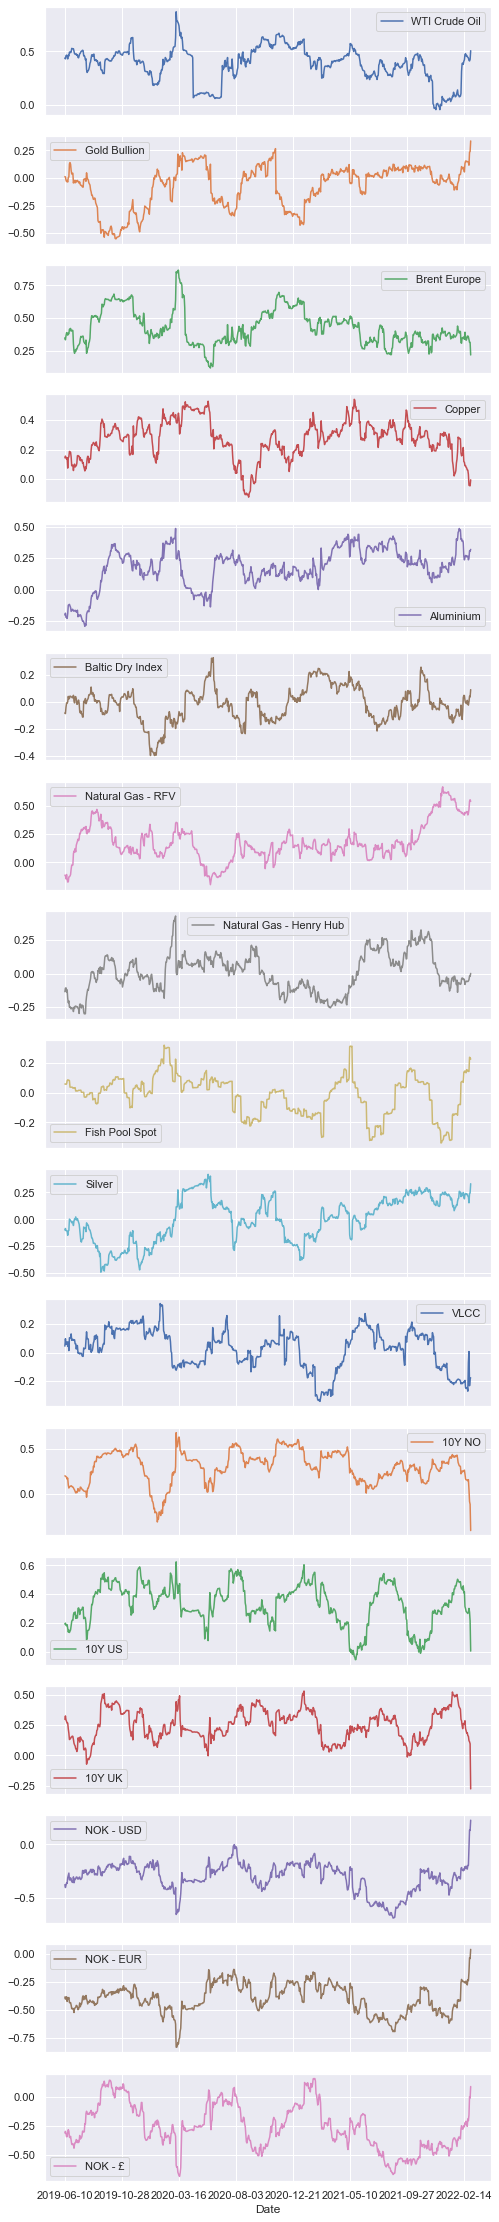

In [523]:
frame = factor_corr_50[eqt_name_no][interval_start:interval_end]
frame.plot(subplots=True, figsize=(8,40))
plt.show()

In [481]:
corr_list_50 = round(frame.mean(),2).sort_values(ascending=False)
corr_list_50

Brent Europe               0.43
WTI Crude Oil              0.38
10Y US                     0.33
10Y NO                     0.30
Copper                     0.27
10Y UK                     0.25
Aluminium                  0.18
Natural Gas - RFV          0.18
VLCC                       0.03
Natural Gas - Henry Hub    0.01
Silver                     0.00
Fish Pool Spot            -0.02
Baltic Dry Index          -0.02
Gold Bullion              -0.07
NOK - £                   -0.26
NOK - USD                 -0.31
NOK - EUR                 -0.40
dtype: float64

In [482]:
### How low-correlated factors are correlated in the trading scheme
corr_list_50[abs(corr_list_50) <= 0.1]

VLCC                       0.03
Natural Gas - Henry Hub    0.01
Silver                     0.00
Fish Pool Spot            -0.02
Baltic Dry Index          -0.02
Gold Bullion              -0.07
dtype: float64

<AxesSubplot:xlabel='Name'>

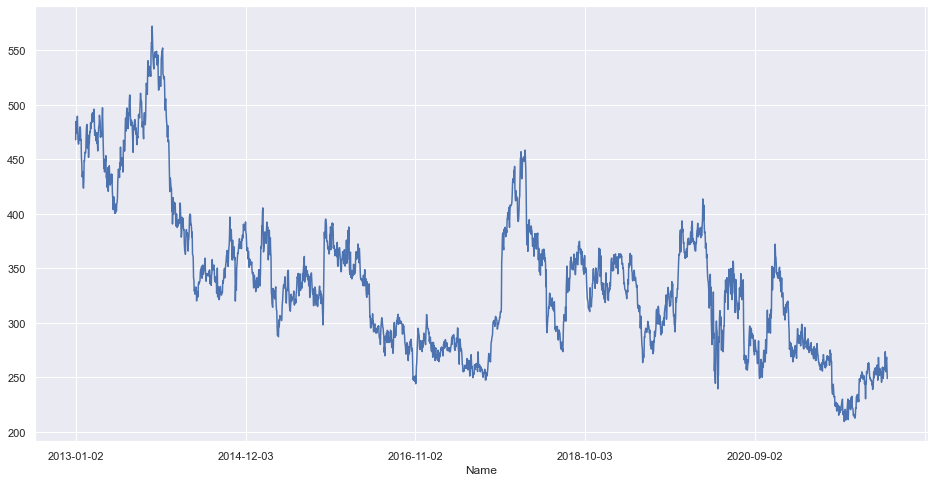

In [124]:
ratio = pair.iloc[:,0] / pair.iloc[:,1]
z = (ratio - ratio.mean()) / ratio.std()
ratio.plot(figsize=(16,8))

<AxesSubplot:xlabel='Name'>

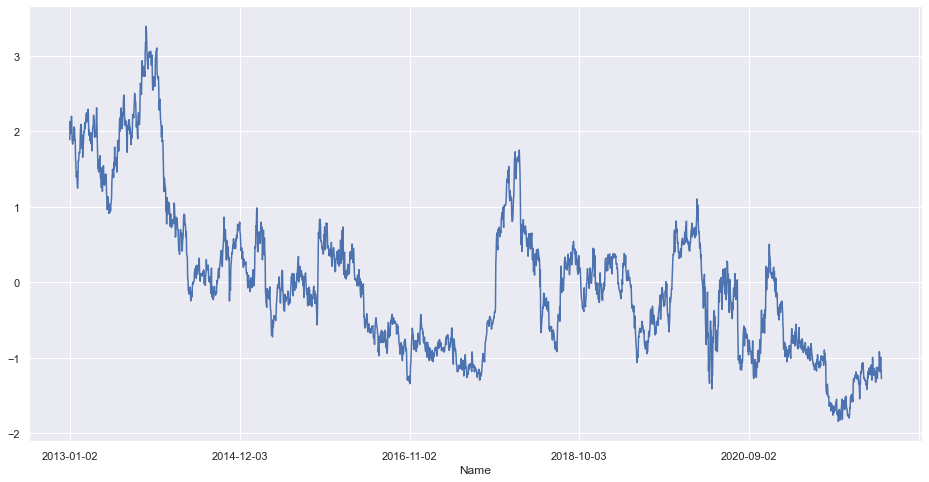

In [125]:
z.plot(figsize=(16,8))